# Linear Algebra in the 3D space

The world in which we live in has three dimensions. However, computer screens are two-dimensional, and therefore, to visualize them in our screens we will need to take 3D objects designated by 3D vectors and *convert them* to 2D, so that we can draw them up on the screen.

We will deal with several techniques, like using shading:

![Sphere shading](pics/sphere-shading.png)

Without the shading, the image abobe would look like a regular 2D circle, but the shading makes it look like a 3D sphere.

The strategy here is not to draw a perfectly round sphere, but instead, an approximation made up of polygons, with each polygon shaded according to the precise angle it makes with a light source.

![Sphere triangles](pics/sphere-triangles.png)

In this section we will deal with:
+ vectors in the 3D space
+ techniques and transformations to visualize 3D vectors in the 2D plane

## Vectors in the 3D space

We interpret 3D vectors in a similar way to what we do with vectors in the plane. We start with a finite box of 3D space, keeping the *x* and *y* directions from the plane, which we lay out at the bottom of the box, and we add a *z* direction for the depth:

![3D box](pics/3d-box.png)

We can picture any 2D vector as a 3D vector with its depth coordinate *z* set to zero.

![2D vector in 3D](pics/2d-vector-in-3d.png)

Now, if we slightly modify the previous 2D vector and set its depth (*z* coordinate) to a value other than zero we will be dealing with a 3D vector:

![3D vector](pics/3d-vector.png)

### Representing 3D vectors with coordinates

In the 2D plane, two numbers, such as $ (4, 3) $ were sufficient to designate a single point, but in 3D there is a whole line of points in 3D with coordinates $ x = 4 $, and $ y = 3 $.

![Two coords define a line in 3d](pics/two-coord-in-space.png)

To specify a unique point in 3D, we need three numbers such as $ (4, 3, 5) $. These numbers will give us the x-, y-, and z- coordinates for a vector in 3D.

The way to locate the point or vector is to first go 4 units in the x- positive/right direction from the origin, then 3 units in the y- direction (width), and finally 5 units in the z- direction (depth).

![Locating a point with its coords](pics/locating_point_by_coords.png)

### The `vec3d` library

As in the previous chapter, a library is provided to facility drawings in 3D using Matplotlib as the backend.

By default, `draw3d()` shows the axes and original as well as a small box of 3D space for facilitate the visualization.

Before using the libary, make sure that the `.vscodes/settings.json` includes the path to the vec3d library in the `python.analysis.extraPaths`:

```json
 {
  "python.analysis.extraPaths": [
    "\"./lib\"",
    "/home/ubunt/anaconda3/bin",
    "/home/ubuntu/anaconda3/lib/python3.8/site-packages",
    "./part_2-math/02_mini-projects/02_vector-2d-lib-refactoring",
    ".part_2-math/02_mini-projects/03_vector-3d-lib",
  ]
}
```

Also, don't forget to create a symbolic link in the current directory to the directory containing the sources of the `vec3d` library.

```bash
ln -s ../../02_mini-projects/03_vector-3d-lib/vec3d vec3d
```

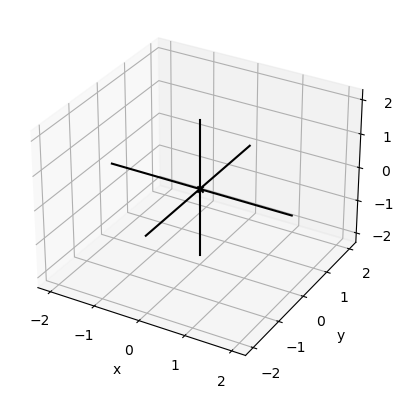

In [2]:
from vec3d.graph import draw3d

draw3d()

The origin is the coordinate `(0, 0, 0)`, and the axes emanate from it in the positive and negative x, y (in the bottom, as if the 2D plane would site for in `z=0`) and z (going up and down).

The `Points3D` class stores a collections of vectors, interpreted as points and not arrows.

For example, we could plot the vectors designated by the coordinates `(2, 2, 2)` and `(1, -2, -2)` as points:

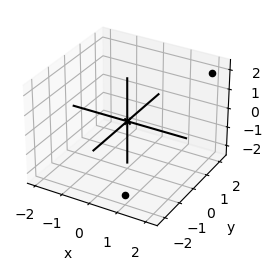

In [3]:
from vec3d.graph import Points3D, draw3d

draw3d(
    Points3D((2, 2, 2), (1, -2, -2))
)

To visualize the vectors as arrows, you can use the `Arrow3D` class. These can be styled with `Color3D` enum:

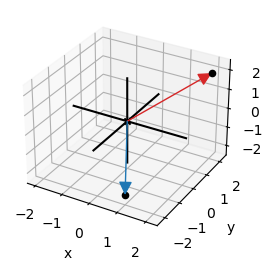

In [4]:
from vec3d.graph import Points3D, Arrow3D, draw3d, Colors3D

draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),  # default is RED
    Arrow3D((1, -2, -2), color=Colors3D.BLUE)
)

The `Segment3D` can be used to connect two points:

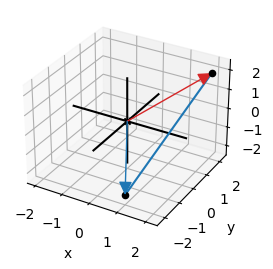

In [5]:
from vec3d.graph import Points3D, Arrow3D, Segment3D, draw3d, Colors3D

draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),  # default is RED
    Arrow3D((1, -2, -2), color=Colors3D.BLUE),
    Segment3D((2, 2, 2), (1, -2, -2))
)

Segments can also be styled with dashed lines and different color:

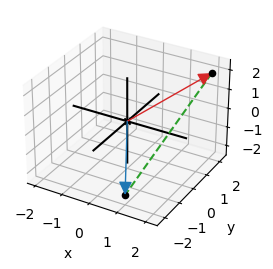

In [6]:
from vec3d.graph import Points3D, Arrow3D, Segment3D, draw3d, Colors3D, LineStyles3D

draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),  # default is RED
    Arrow3D((1, -2, -2), color=Colors3D.BLUE),
    Segment3D((2, 2, 2), (1, -2, -2), color=Colors3D.GREEN, linestyle=LineStyles3D.DASHED)
)

All 3D plots result from projecting the 3D coordinates of the figures in the 2D plane, and sometimes, it's not easy to visualize the actual position of a point or vector.

`Box3D` class can help with that. This class plots a dashed box that includes the point or tip of the vector:

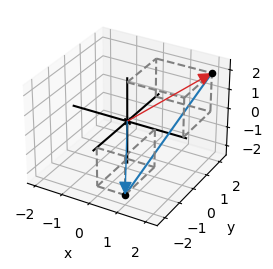

In [7]:
from vec3d.graph import Points3D, Arrow3D, Segment3D, Box3D, draw3d, Colors3D

draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),  # default is RED
    Arrow3D((1, -2, -2), color=Colors3D.BLUE),
    Segment3D((2, 2, 2), (1, -2, -2)),
    Box3D(2, 2, 2),
    Box3D(1, -2, -2)
)

The library also includes a set of extra parameters that can help establishing the camera at a better angle or elevation, create a larger or smaller plot, or set up custom ticks in the axes.

For example, using 10° for the elevation and 275° as azimuth, and enlarging the canvas a little bit.

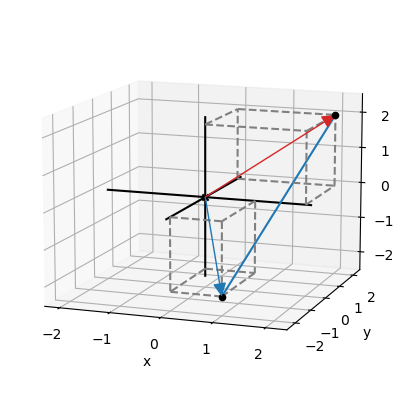

In [15]:
from vec3d.graph import Points3D, Arrow3D, Segment3D, Box3D, draw3d, Colors3D

draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),  # default is RED
    Arrow3D((1, -2, -2), color=Colors3D.BLUE),
    Segment3D((2, 2, 2), (1, -2, -2)),
    Box3D(2, 2, 2),
    Box3D(1, -2, -2),
    elev=12,
    azim=290,
    width=10
)

Note that when you plot the same picture outside of a Jupyter notebook, you'll get an interactive plot in which you'll be able to change the elevation and azim values interactively using the mouse.

We can also recreate the pictures from the previous section:

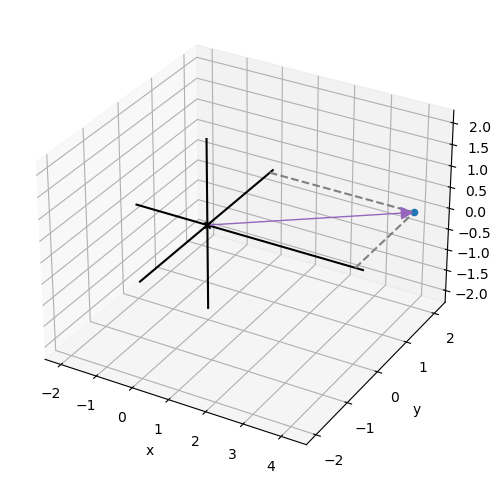

In [24]:
from vec3d.graph import Points3D, Arrow3D, LineStyles3D, draw3d

draw3d(
    Points3D((4, 2, 0), color=Colors3D.BLUE),
    Arrow3D((4, 2, 0), color=Colors3D.PURPLE),
    Segment3D((4, 0, 0), (4, 2, 0), color=Colors3D.GRAY, linestyle=LineStyles3D.DASHED),
    Segment3D((0, 2, 0), (4, 2, 0), color=Colors3D.GRAY, linestyle=LineStyles3D.DASHED)
)

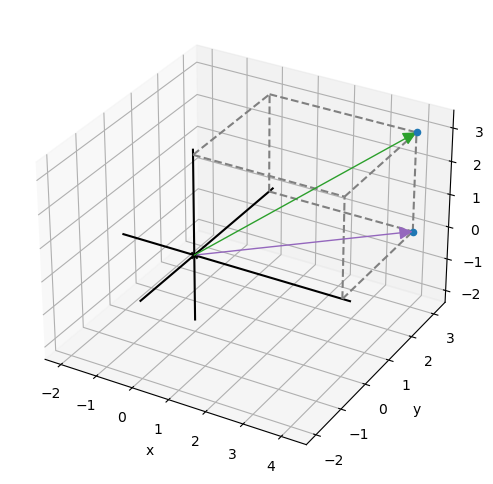

In [26]:
from vec3d.graph import Points3D, Arrow3D, Box3D, draw3d

draw3d(
    Points3D((4, 3, 0), color=Colors3D.BLUE),
    Arrow3D((4, 3, 0), color=Colors3D.PURPLE),
    Points3D((4, 3, 3), color=Colors3D.BLUE),
    Arrow3D((4, 3, 3), color=Colors3D.GREEN),
    Box3D(4, 3, 3)
)

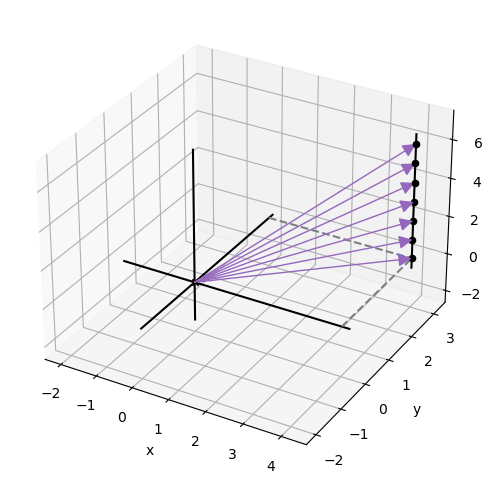

In [30]:
from vec3d.graph import Points3D, Arrow3D, Segment3D, draw3d

points_coords = [(4, 3, z) for z in range(7)]

points_3d = [Points3D(p) for p in points_coords]
arrows_3d = [Arrow3D(p, color=Colors3D.PURPLE) for p in points_coords]

draw3d(
    *points_3d,
    *arrows_3d,
    Segment3D((4, 3, -0.5), (4, 3, 6.5), color=Colors3D.BLACK),
    Segment3D((4, 0, 0), (4, 3, 0), color=Colors3D.GRAY, linestyle=LineStyles3D.DASHED),
    Segment3D((0, 3, 0), (4, 3, 0), color=Colors3D.GRAY, linestyle=LineStyles3D.DASHED)
)

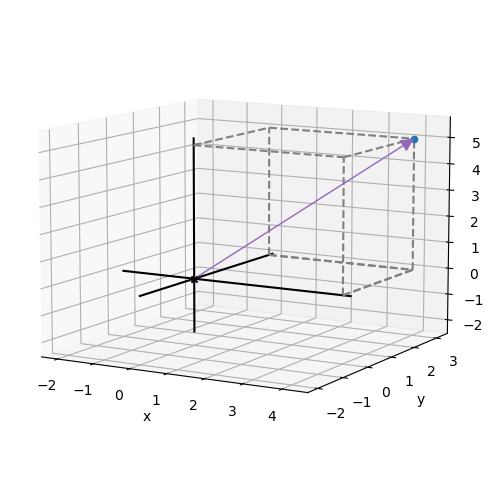

In [32]:
from vec3d.graph import Points3D, Arrow3D, Segment3D, Box3D, draw3d


draw3d(
    Points3D((4, 3, 5), color=Colors3D.BLUE),
    Arrow3D((4, 3, 5), color=Colors3D.PURPLE),
    Box3D(4, 3, 5),
    Segment3D((4, 0, 0), (4, 3, 0), color=Colors3D.GRAY, linestyle=LineStyles3D.DASHED),
    Segment3D((0, 3, 0), (4, 3, 0), color=Colors3D.GRAY, linestyle=LineStyles3D.DASHED),
    elev=10
)

### Exercise

Draw the 3D arrow and point representing the coordinates (-1, -2, 2), as well as the dashed box that facilitates the visualization of the arrow.

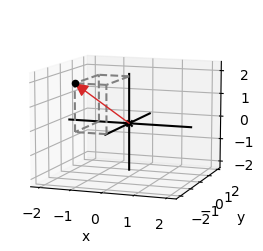

In [45]:
from vec3d.graph import Arrow3D, Points3D, Box3D, draw3d

v = (-1, -2, 2)

draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v),
    azim=-70,
    elev=10
)

Note that `azim=-70` rotates the view 70° around the z-axis in a clockwise fashion.

This facilitates the view in this particular exercise.

### Exercise

There are exactly eight 3D vectors whose coordinates are all either +1 or -1. For example, $ (1, -1, 1) $ is one of these. Plot all these vectors as points. Then figure out how to connect them with line segments using `Segment3D` to form the outline of a cube.

HINT: You'll need 12 segments in total.

Calculating the vertices is easy, but the cube is not simply drawing lines between the vertices.

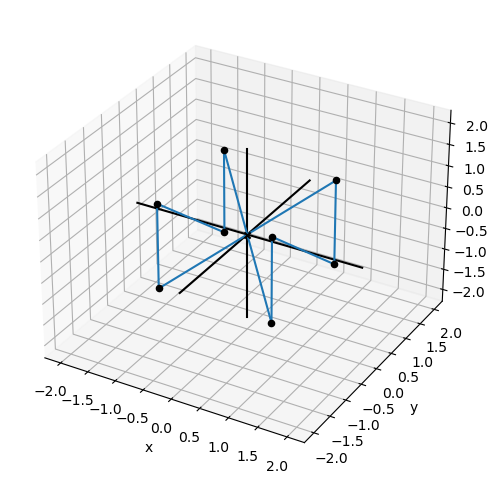

In [49]:
from vec3d.graph import Points3D, Segment3D, draw3d

values = [-1, 1]
verts = [(x, y, z) for x in values for y in values for z in values]
segments = [Segment3D(verts[i], verts[(i + 1) % len(verts)]) for i in range(len(verts))]


draw3d(
    Points3D(*verts),
    *segments
)


We need to think about the characteristics that designate the faces of the cubes.

For example, the front face is designated by the vertices:
(-1, -1, -1), (-1, 1, -1), (-1, -1, 1), (-1, 1, 1)

And the segments to draw will be:
[(-1, -1, -1), (-1, 1, -1)]
[(-1, 1, -1), (-1, 1, 1)]
[(-1, 1, 1), (-1, -1, 1)]
[(-1, -1, 1), (-1, -1, -1)]

Let's validate it:

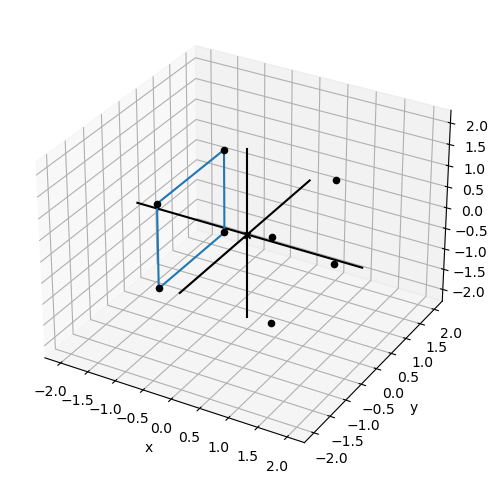

In [54]:
from vec3d.graph import Points3D, Segment3D, draw3d

values = [-1, 1]
verts = [(x, y, z) for x in values for y in values for z in values]
segments = [
    [(-1, -1, -1), (-1, 1, -1)],
    [(-1, 1, -1), (-1, 1, 1)],
    [(-1, 1, 1), (-1, -1, 1)],
    [(-1, -1, 1), (-1, -1, -1)]
]

segments_3d = [Segment3D(start, end) for start, end in segments]


draw3d(
    Points3D(*verts),
    *segments_3d
)

If we examine this we see that x=-1 and the other coords vary.

[(-1, -1, -1), (-1, 1, -1)]
[(-1, 1, -1), (-1, 1, 1)]
[(-1, 1, 1), (-1, -1, 1)]
[(-1, -1, 1), (-1, -1, -1)]

For the other face, we will have:
[(-1, -1, -1), (1, -1, -1)],
[(1, -1, -1), (1, -1, 1)],
[(1, -1, 1), (-1, -1, 1)]
[(-1, -1, 1), (-1, -1, -1)]


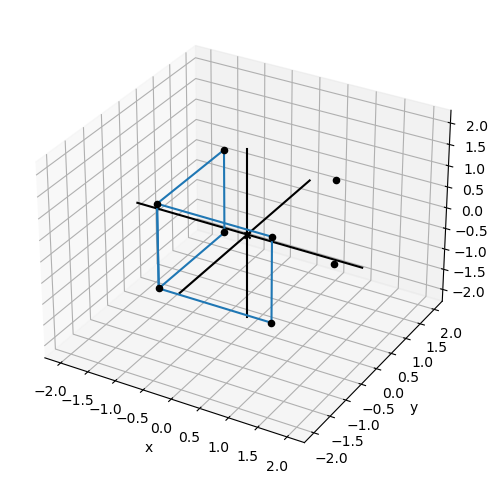

In [57]:
from vec3d.graph import Points3D, Segment3D, draw3d

values = [-1, 1]
verts = [(x, y, z) for x in values for y in values for z in values]
segments = [
    # face 1
    [(-1, -1, -1), (-1, 1, -1)],
    [(-1, 1, -1), (-1, 1, 1)],
    [(-1, 1, 1), (-1, -1, 1)],
    [(-1, -1, 1), (-1, -1, -1)],

    # face 2
    [(-1, -1, -1), (1, -1, -1)],
    [(1, -1, -1), (1, -1, 1)],
    [(1, -1, 1), (-1, -1, 1)],
    [(-1, -1, 1), (-1, -1, -1)]
]

segments_3d = [Segment3D(start, end) for start, end in segments]


draw3d(
    Points3D(*verts),
    *segments_3d
)

So, for the 2nd face we have:

y = -1, and x, z varies

    [(-1, -1, -1), (1, -1, -1)],
    [(1, -1, -1), (1, -1, 1)],
    [(1, -1, 1), (-1, -1, 1)],
    [(-1, -1, 1), (-1, -1, -1)]

It's not easy to find a pattern, but the following snippet describes all the segments (also called edges) of the cube.

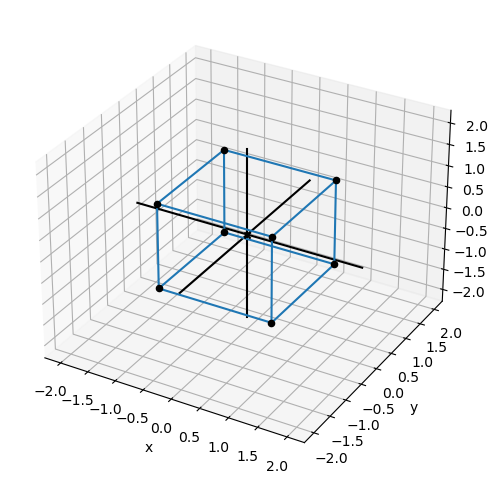

In [6]:
from vec3d.graph import Points3D, Segment3D, draw3d

values = [-1, 1]
verts = [(x, y, z) for x in values for y in values for z in values]
segments = [[(-1, y, z), (1, y, z)] for y in values for z in values] +\
    [[(x, -1, z), (x, 1, z)] for x in values for z in values] +\
    [[(x, y, -1), (x, y, 1)] for x in values for y in values]


segments_3d = [Segment3D(start, end) for start, end in segments]


draw3d(
    Points3D(*verts),
    *segments_3d
)

## Vector arithmetic in 3D

All the arithmetic operations we saw in 2D have analogies in 3D, and the geometric effects of each are similar.

### Adding 3D vectors

Both the geometric interpretation (tip-to-tail) and algebraic formulas and properties for vector addition in 3D work in the same way as in 2D.

For example:

$
(2, 1, 1) + (1, 2, 2) = (2 + 1, 1 + 2, 1 + 2) = (3, 3, 3)
$

2023-10-26 07:50:21,157 [    INFO] (vec3d.graph.vector3d_graphics) | Using vec3d.graph v0.1.0


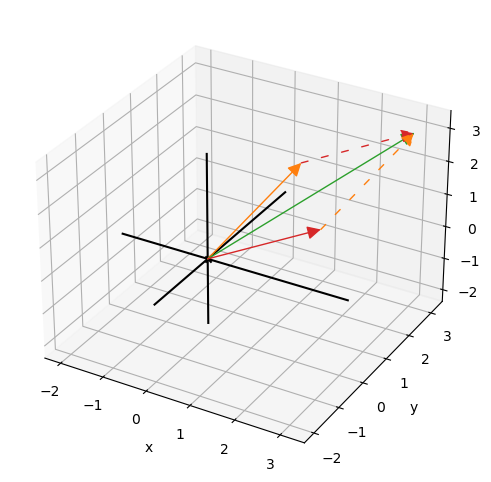

In [1]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, LineStyles3D

def add(v1, v2):
    v1x, v1y, v1z = v1
    v2x, v2y, v2z = v2
    return (v1x + v2x, v1y + v2y, v1z + v2z)

v1 = (2, 1, 1)
v2 = (1, 2, 2)

draw3d(
    Arrow3D(v1, color=Colors3D.RED),
    Arrow3D(v2, color=Colors3D.ORANGE),
    Arrow3D(add(v1, v2), color=Colors3D.GREEN),
    Arrow3D(add(v1, v2), v1, color=Colors3D.ORANGE, linestyle=LineStyles3D.LOOSELY_DASHED),
    Arrow3D(add(v1, v2), v2, color=Colors3D.RED, linestyle=LineStyles3D.LOOSELY_DASHED)
)

Also, as in 2D, we can add any number of 3D vectors by summing together all of their x-coordinates, all of their y-coordinates, and all of their z-coordinates.

$
(1, 1, 3) + (2, 4, -4) + (4, 2, -2) = (7, 7, -3)
$

2023-10-26 07:58:31,712 [    INFO] (vec3d.graph.vector3d_graphics) | Using vec3d.graph v0.1.0


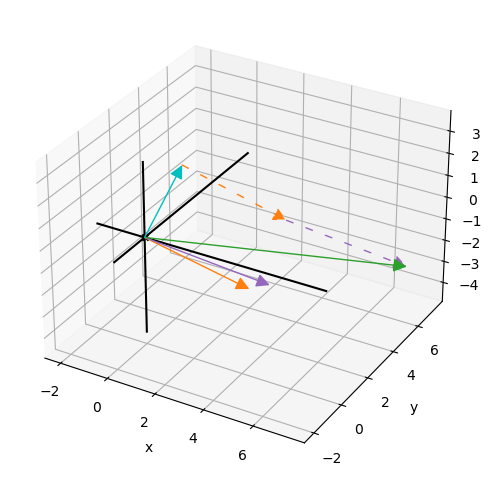

In [1]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, LineStyles3D

def add(v1, v2, v3):
    v1x, v1y, v1z = v1
    v2x, v2y, v2z = v2
    v3x, v3y, v3z = v3
    return (v1x + v2x + v3x, v1y + v2y + v3y, v1z + v2z + v3z)

def add2(v1, v2):
    v1x, v1y, v1z = v1
    v2x, v2y, v2z = v2
    return (v1x + v2x, v1y + v2y, v1z + v2z)

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

draw3d(
    Arrow3D(v1, color=Colors3D.RED),
    Arrow3D(v2, color=Colors3D.ORANGE),
    Arrow3D(v3, color=Colors3D.PURPLE),
    Arrow3D(add(v1, v2, v3), color=Colors3D.GREEN),

    Arrow3D(add2(v1, v2), v1, color=Colors3D.ORANGE, linestyle=LineStyles3D.LOOSELY_DASHED),
    Arrow3D(add(v1, v2, v3), add2(v1, v2), color=Colors3D.PURPLE, linestyle=LineStyles3D.LOOSELY_DASHED)
)

We can define an `add` function that takes any number of vectors.

The following snippet illustrates how we can write that function from the less to the most pythonic:

In [12]:
# less pythonic
def add(*vectors):
    coords = [0, 0, 0]
    for v in vectors:
        x, y, z = v
        coords[0] += x
        coords[1] += y
        coords[2] += z
    return (coords[0], coords[1], coords[2])

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

add(v1, v2, v3)

(7, 7, -3)

In [14]:
# a bit more pythonic
def add(*vectors):
    xs = [v[0] for v in vectors]
    ys = [v[1] for v in vectors]
    zs = [v[2] for v in vectors]
    return (sum(xs), sum(ys), sum(zs))

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

add(v1, v2, v3)

(7, 7, -3)

In [15]:
# very pythonic
def add(*vectors):
    return (
        sum([x for x, _, _ in vectors]),
        sum([y for _, y, _ in vectors]),
        sum([z for _, _, z in vectors]),
    )

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

add(v1, v2, v3)

(7, 7, -3)

In [19]:
# final version: Pythonic level turned up to 11!
def add(*vectors):
    zipped_by_coords = zip(*vectors)
    summed_by_coords = [sum(coords) for coords in zipped_by_coords]
    return tuple(summed_by_coords)


v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

add(v1, v2, v3)


(7, 7, -3)

Let's explore a bit how did we get to that Pythonic solution.

Calling:

```python
zip(*vectors)
```

will extract the corresponding x, y, and z coordinates from all the vectors. Note that the star operator `*` is used when calling `zip`. Otherwise, we will end up with something different:

In [23]:
v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)


print(f"This is what we want: {list(zip(v1, v2, v3))}")
print(f"but not this: {list(zip([v1, v2, v3]))}")

def fn(*vectors):
    return zip(vectors)

print(f"but not this: {list(fn(v1, v2, v3))}")

This is what we want: [(1, 2, 4), (1, 4, 2), (3, -4, -2)]
but not this: [((1, 1, 3),), ((2, 4, -4),), ((4, 2, -2),)]
but not this: [((1, 1, 3),), ((2, 4, -4),), ((4, 2, -2),)]


With the x, y, and z coordinates organized in its corresponding tuple, we can use the `sum` function on each tuple.

The sum function needs to be applied to each tuple (i.e., you cannot do `sum(zip(v1, v2, v3)))`:

In [25]:
v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

zip_coords = zip(v1, v2, v3)
# sum_coords = sum(zip_coords) # unsupported operand types
[sum(coords) for coords in zip_coords]



[7, 7, -3]

The last step is to convert the list into a tuple (as we're managing vectors as tuples).

We can use the `tuple` which is very Pythonic, or use literals:

In [27]:
v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

zip_coords = zip(v1, v2, v3)
vector_as_list = [sum(coords) for coords in zip_coords]

# using literal (a bit uglier)
x, y, z = vector_as_list
(x, y, z)

# using tuple constructor
tuple(vector_as_list)

(7, 7, -3)

Note that we could have also written the `add` function in a more *functional* way using `map`, although that style is considered less Pythonic:

In [28]:
def add_fn(*vectors):
    return tuple(map(sum, zip(*vectors)))

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

add_fn(v1, v2, v3)

(7, 7, -3)

In any case, the function is available in our `vec3d.math` library of Math utility functions for the 3D space:

In [29]:
from vec3d.math import add

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)
add(v1, v2, v3)

(7, 7, -3)

### Scalar multiplication in 3D

To multiply a 3D vector by a scalar, you just need to multiply all of its components by the scalar factor.

For example:

$
2 \cdot (1, 2, 3) = (2, 4, 6)
$

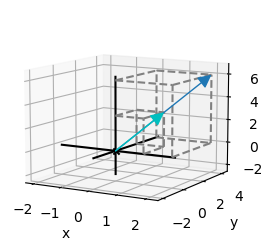

In [35]:
from vec3d.graph import draw3d, Arrow3D, Box3D, Colors3D

def scalar_product(s, v):
    return (s * v[0], s * v[1], s * v[2])

v = (1, 2, 3)

draw3d(
    Arrow3D(scalar_product(2, v), color=Colors3D.BLUE),
    Arrow3D(v, color=Colors3D.CYAN),
    Box3D(*scalar_product(2, v)),
    Box3D(*v),
    elev=10
)


The scalar product is available in the 3D math library `scale` function:

In [1]:
from vec3d.math import scale

v = (1, 2, 3)
scale(2, v)

(2, 4, 6)

### Subtracting 3D vectors

In 3D space, the difference between two vectors $ v - w $ is also called the *displacement*, that is, the vector that goes from the tip of $ w $ (start of the displacement) to the tip of $ v $ (end of the displacement).

Algebraically, the difference between two vectors can be calculated by subtracting the components of the coordinates of the second vector from the first one:

$
v = (v_x, v_y, v_ z) \
w = (w_x, w_v, w_z) \
v - w = (v_x - w_x, v_y - w_y, v_z - w_z)
$

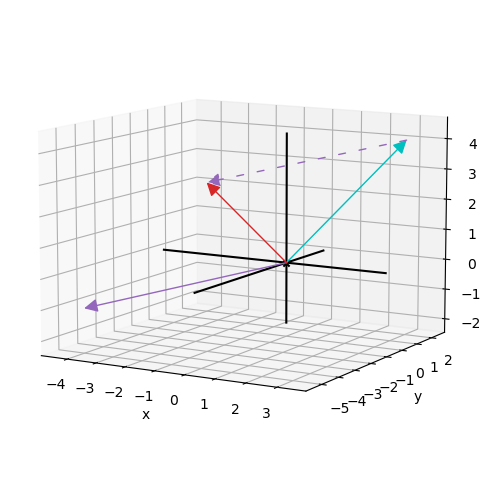

In [15]:
from vec3d.graph import Arrow3D, Box3D, Colors3D, draw3d, LineStyles3D

v = (-1, -3, 3)
w = (3, 2, 4)

def subtract(v, w):
    zipped_by_coord = zip(v, w)
    return tuple([v_c - w_c for v_c, w_c in zipped_by_coord])

draw3d(
    Arrow3D(v, color=Colors3D.RED),
    Arrow3D(w, color=Colors3D.CYAN),
    Arrow3D(v, w, color=Colors3D.PURPLE, linestyle=LineStyles3D.LOOSELY_DASHED),
    Arrow3D(subtract(v, w), color=Colors3D.PURPLE),
    elev=10
)

The `subtract` function is available in our library.

In [2]:
from vec3d.math import subtract

v = (-1, -3, 3)
w = (3, 2, 4)

assert subtract(v, w) == (-4, -5, -1)

### Computing lengths and distances

In 2D, we calculated the length of a vector using the Pythogorean theorem, banking on the fact that an arrow vector and its components make a right triangle on the plane. We also established that the distance between two points in the plane was just the length of the displacement vector (i.e., the length of the vector that results from subtracting them).

Let's try to find the length of a vector in 3D following a similar approach.

Let the vector be $ (4, 3, 12) $. The x and y components still give us a right triangle lying in the plane $ z = 0 $.

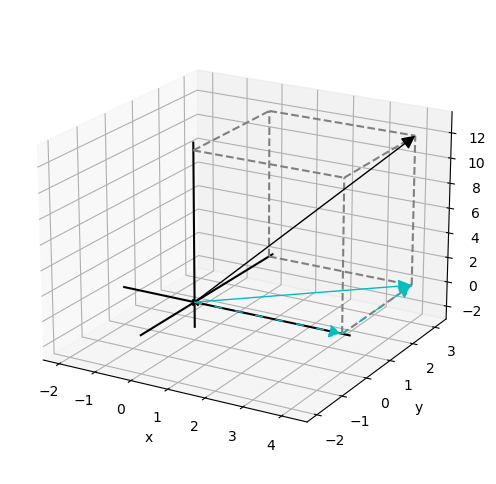

In [9]:
from vec3d.graph import draw3d, Arrow3D, Box3D, Colors3D, LineStyles3D

v = (4, 3, 12)

draw3d(
    Arrow3D(v, color=Colors3D.BLACK),
    Box3D(*v),
    Arrow3D((4, 3, 0), color=Colors3D.CYAN),
    Arrow3D((4, 0, 0), color=Colors3D.CYAN, linestyle=LineStyles3D.LOOSELY_DASHED),
    Arrow3D((4, 3, 0), (4, 0, 0), color=Colors3D.CYAN, linestyle=LineStyles3D.LOOSELY_DASHED),
    elev=20
)

Thus, in the plane $ z = 0 $, we can calculate the hypotenuse of the triangle designated by the sides $ (4, 0, 0) $ and $ (4, 3, 0) $. 

That hypotenuse, happens to be side of the triangle whose hypotenuse is $ (4, 3, 12) $. The other side of that right triangle (depicted below in dashed red) is the $ z $ component of the vector (i.e, $ (0, 0, 12) $).

The hypothenuse will be $ \sqrt{4^2 + 3^2} = 5 $.

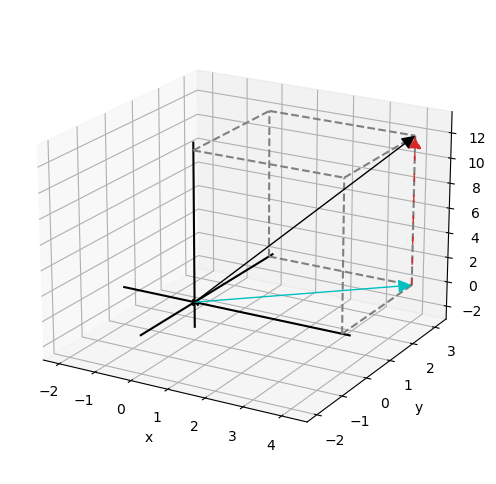

In [11]:
from vec3d.graph import draw3d, Arrow3D, Box3D, Colors3D, LineStyles3D

v = (4, 3, 12)

draw3d(
    Arrow3D(v, color=Colors3D.BLACK),
    Box3D(*v),
    Arrow3D((4, 3, 0), color=Colors3D.CYAN),
    Arrow3D(v, (4, 3, 0), color=Colors3D.RED, linestyle=LineStyles3D.LOOSELY_DASHED),
    elev=20
)

As a result, the length of the black vector will be:

$ 
| v | = | (x, y, z) | = \sqrt{\sqrt{x^2 + y^2}^2 + z^2} = \
= \sqrt{x^2 + y^2 + z^2}
$

This is therefore, an extension of the formulate that we had for the length of the vector in 2D.

The `length` function is available in our Math library:

In [1]:
from vec3d.math import length

assert length((4, 3, 12)) == 13

With the length formula in place, we can calculate the distance between any given two points in the space designated by $ v $ and $ w $:

$
distance = | v - w | = \sqrt{(v_x - w_x)^2 + (v_y - w_y)^2 + (v_z - w_z)^2}
$



### Computing angles and directions

In 2D, a number (length of the displacement) and an angle uniquely identify a vector. Those were the polar coordinates of a 2D vector.

Similarly, in 3D a displacement of certain length, and two angles  can uniquely identify a 3D vector.

For the first angle, we again think of the *projection* of the vector in the $ z = 0 $ plane. That vector will make some angle with the positive x-axis, as we did in the 2D plane. It is customary to label this angle as $ \phi $.

![Polar component: phi](pics/polar_comp_phi.png)

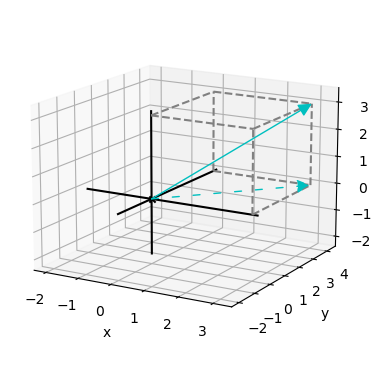

In [8]:
from vec3d.graph import draw3d, Box3D, Arrow3D, Colors3D, LineStyles3D

draw3d(
    Arrow3D((3, 4, 3), color=Colors3D.CYAN),
    Box3D(3, 4, 3),
    Arrow3D((3, 4, 0), color=Colors3D.CYAN, linestyle=LineStyles3D.LOOSELY_DASHED),
    elev=15
)

The second angle is the one that the vector makes with the z-axis, which is typically labeled as $ \theta $.

![Polar component: theta](pics/polar_comp_theta.png)

The length of the vector (labeled $ r $), along with the angles $ \phi $ and $ \theta $ will uniquely any vector in 3D space.

In 3D space we call these the *spherical coordinates* of a vector.

| NOTE: |
| :---- |
| While calculating the spherical coordinates from Cartesian coordinates is possible using the trigonometry we've covered so far, we won't be using spherical coordinates any more.<br>While polar coordinates were useful to perform rotations of a collection of plane vectors, and determine the angle between two vectors, in 3D the angles $ \phi $ and $ \theta $ won't let you do that. And while we can easily rotate a vector around the z-axis adding or subtracting from the angle $ \theta $, we can not do the same to rotate around the x- and y-axis. |

### Exercise

Draw $ (4, 0, 3) $ and $ (-1, 0, 1) $ as `Arrow3D` objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?


Let's first calculate it algebraically by hand:

$
sum = (4, 0, 3) + (-1, 0, 1) = (3, 0, 4)
$

2023-10-29 09:34:23,295 [    INFO] (vec3d.graph.vector3d_graphics) | Using vec3d.graph v0.1.0


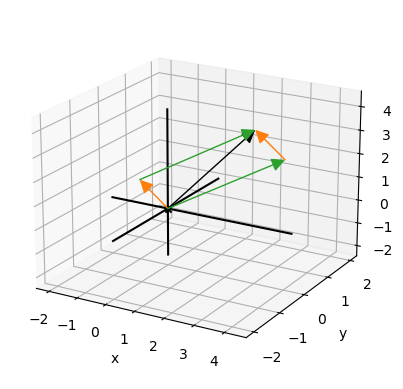

In [1]:
from vec3d.math import add
from vec3d.graph import Arrow3D, Box3D, draw3d, Colors3D, LineStyles3D

v = (4, 0, 3)
w = (-1, 0, 1)

assert add(v, w) == (3, 0, 4)

draw3d(
    Arrow3D(v, color=Colors3D.GREEN),
    Arrow3D(add(v, w), v, color=Colors3D.ORANGE),
    Arrow3D(add(v, w), color=Colors3D.BLACK),
    Arrow3D(w, color=Colors3D.ORANGE),
    Arrow3D(add(w, v), w, color=Colors3D.GREEN),
    elev=20
)

### Exercise

Suppose we set `vectors1=[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]`, and `vectors2=[(1, 2), (3,4), (5, 6)]`. Without evaluating in Python, what are the lengths of `zip(*vectors1)` and `zip(*vectors2)`?

This exercise will let us develop some intuition about how `zip` works.

The `zip` function will take and iterable of iterables and will zip them together. Note that we're using the `*` operator while invoking it in our examples:

For the first case:
```python
len(zip(*vectors1)) = 5 = len(zip((1, 2, 3, 4, 5), (6, 7, 8, 9, 10))) =len(((1, 6), (2, 7), (3, 8), (4, 9), (5, 10)))
```

For the second case:
```python
len(zip(*vectors2)) = 2 = len(zip((1, 2), (3, 4), (5, 6))) = len((1, 3, 5), (2, 4, 6))
```

Let's confirm:

In [5]:
vectors1=[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]

print(list(zip(*vectors1)))
len(list(zip(*vectors1)))

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


5

In [6]:
vectors2=[(1, 2), (3,4), (5, 6)]

print(list(zip(*vectors2)))
len(list(zip(*vectors2)))

[(1, 3, 5), (2, 4, 6)]


2

### Exercise

The following comprehension creates a list of 24 Python vectors:

```python
from math import sin, cos, pi

vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]
```

What is the sum of the 24 vectors?
Draw all 24 of them tip-to-tail as `Arrow3d` objects.

We can rely in our `vec3d` library to compute both the sum and drawing:

In [7]:
from math import sin, cos, pi
from vec3d.math import add

vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

print(add(*vs))

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


Let's think for a moment the technique we use when we do the *tip-to-tail* graphically.

When we have two vectors, we have `v1`, `v2`, and `v1+v2`:

```python
draw3d(
  Arrow3D(v1), # draw the first vector
  Arrow3D(add(v1, v2), v1) # tip is the sum, tail the previous vector
)
```

When we have three vectors, `v1`, `v2`, and `v3`:

```python
draw3d(
  Arrow3D(v1), 
  Arrow3D(add(v1, v2), v1),
  Arrow3D(add(v1, v2, v3), add(v1, v2))
)
```

Now, we start to see the pattern. For `v1`, `v2`, ...`vn` we'd do:

```python
draw3d(
  Arrow3D(v1), 
  Arrow3D(add(v1, v2), v1),
  Arrow3D(add(v1, v2, v3), add(v1, v2)),
  Arrow3D(add(v1, v2, v3, v4), add(v1, v2, v3)),
  ...
  Arrow3D(add(v1, v2, v3, v4, ..., vn_1), add(v1, v2, v3, v4, ..., vn_2)),
  Arrow3D(add(v1, v2, v3, v4, ..., vn), add(v1, v2, v3, v4, ..., vn_2, vn_1))
)
```

+ We need to loop from the first vector to the last vector.
+ Each arrow has as tip the vector resulting of adding the vector considered in the iteration (v1 for the first iteration, v2 for the second iteration...) to the result of the last iteration; except for the first iteration, in which it is the first vector itself.
+ Each arrow has as it tail, the result of the last iteration; except for the first one, in which there is no tail, and the second one, which is directly the first vector.

We can take a stab at it, using a loop, then we can think about how to make the solution more pythonic:

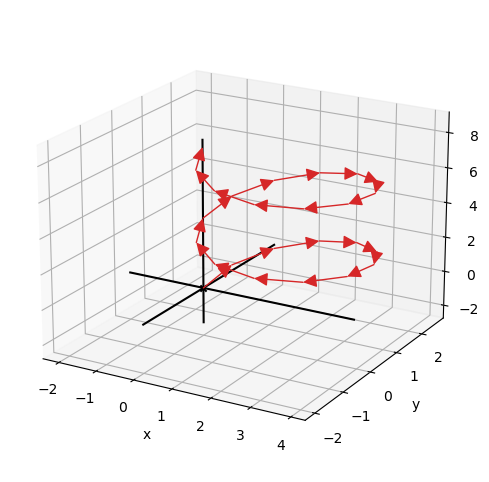

In [15]:
from math import sin, cos, pi
from vec3d.math import add
from vec3d.graph import draw3d, Arrow3D, Colors3D

vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

arrows = []
for i, v in enumerate(vs):
    if i == 0:
        arrows.append(Arrow3D(v))
        prev_result = v
    else:
        arrows.append(Arrow3D(add(v, prev_result), prev_result))
        prev_result = add(v, prev_result)

# Validate we're getting the same result algebraically and geometrically
assert arrows[-1].tip == add(*vs)

draw3d(
    *arrows,
    elev=20
)

Now, let's try to make the solution more pythonic. The first thing we should get rid of, is the `if` within the loop. We can easily do that by defining a `running_sum` variable. By getting rid of the `if`, we'd also get rid of the enumeration:

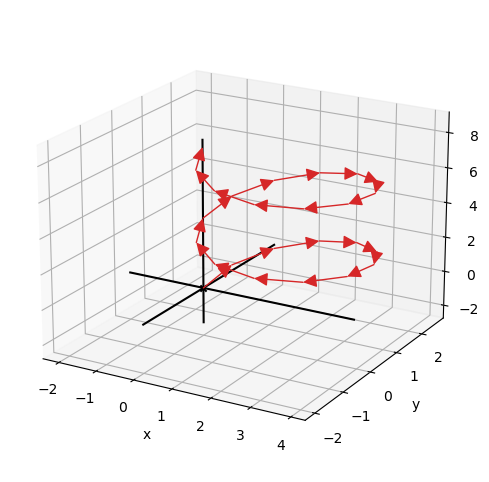

In [16]:
from math import sin, cos, pi
from vec3d.math import add
from vec3d.graph import draw3d, Arrow3D, Colors3D

vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

arrows = []
running_sum = (0, 0, 0)
for v in vs:
    next_sum = add(v, running_sum)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum

# Validate we're getting the same result algebraically and geometrically
assert arrows[-1].tip == add(*vs)

draw3d(
    *arrows,
    elev=20
)

To make it even more pythonic, we'd need to use comprehensions instead of a `for` loop, but for that we will need to create intermediate lists and that will complicate the solution.

### Exercise

Write a function `scale(scalar, vector)` that returns the input scalar times the input vector. Specifically write it so that it works both on the 2D plane and the 3D space (or vectors on any numbers of coordinates).

The non-generic way to write scale was:

In [24]:
def scale2d(scalar, vector2d):
    return (scalar * vector2d[0], scalar * vector2d[1])

def scale3d(scalar, vector3d):
    return (scalar * vector3d[0], scalar * vector3d[1], scalar * vector3d[2])


In order to make it generic for any number of coordinates, we need to use a different approach that would iterate over the coordinates of the given vector.

We can start using lists:

In [26]:
def scale(scalar, vector):
    return [scalar * coord for coord in vector]

print(scale(2, (1, 2, 3)))

<generator object scale.<locals>.<genexpr> at 0x7f523b232420>


And then convert it into a tuple:

In [27]:
def scale(scalar, vector):
    return tuple([scalar * coord for coord in vector])

assert scale(2, (1, 2)) == (2, 4)
assert scale(2, (1, 2, 3)) == (2, 4, 6)
assert scale(2, (1, 2, 3, 4)) == (2, 4, 6, 8)

Note that you don't even need to use the `[]`:

In [28]:
def scale(scalar, vector):
    return tuple(scalar * coord for coord in vector)

assert scale(2, (1, 2)) == (2, 4)
assert scale(2, (1, 2, 3)) == (2, 4, 6)
assert scale(2, (1, 2, 3, 4)) == (2, 4, 6, 8)

### Exercise

Let $ u = (1, -1, -1) $, $ v = (0, 0, 2) $. What is the result of $ u + \frac{1}{2}(v - u) $? Do it by hand and using the `vec3d.math` library.

Let's do it first by hand:

$
u + \frac{1}{2}(v - u) = (1, -1, -1) + \frac{1}{2} \cdot ((0, 0, 2) - (1, -1, -1)) = \\
= (1, -1, -1) + \frac{1}{2} \cdot (-1, 1, 3) = \\
= (1, -1, -1) + (-\frac{1}{2}, \frac{1}{2}, \frac{3}{2}) = \\
= (\frac{1}{2}, -\frac{1}{2}, \frac{1}{2})
$

Using the `vec3d` library:

In [30]:
from vec3d.math import add, scale, subtract

u = (1, -1, -1)
v = (0, 0, 2)

assert add(u, scale(1 / 2, subtract(v, u))) == (1 / 2, -1 / 2, 1 / 2)

Note that $ u + \frac{1}{2}(v - u) $ is exactly the halfway point between $ u $ and $ v $.

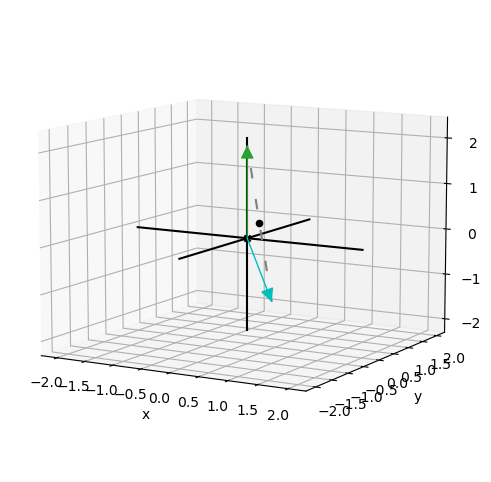

In [46]:
from vec3d.graph import draw3d, Arrow3D, Points3D, Colors3D, Segment3D
from vec3d.math import add, scale, subtract

u = (1, -1, -1)
v = (0, 0, 2)

midpoint = add(u, scale(1 / 2, subtract(v, u)))
draw3d(
    Arrow3D(u, color=Colors3D.CYAN),
    Arrow3D(v, color=Colors3D.GREEN),
    Points3D(midpoint),
    Segment3D(u, v, color=Colors3D.GRAY, linestyle=LineStyles3D.LOOSELY_DASHED),
    elev=10,
)




### Exercise

Try to find the answers without using code, and then check your work.

What is the length of the 2D vector $ (1, 1) $? What is the length of the vector $ (1, 1, 1) $. Even if we hadn't discussed 4D vectors, what is your guess for the length of the 4D vector $ (1, 1, 1, 1) $?

$
| (1, 1) | = \sqrt{1^2 + 1^2} = \sqrt{2} \approx = 1.414
$

$
| (1, 1, 1) | = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3} \approx = 1.732
$

$
| (1, 1, 1, 1) | = \sqrt{1^2 + 1^2 + 1^2 + 1^2} = \sqrt{4} = 2
$



In [51]:
from math import sqrt
from vec3d.math import length


assert length((1, 1)) == sqrt(2)
assert length((1, 1, 1)) == sqrt(3)
assert length((1, 1, 1, 1)) == 2


### Exercise

The coordinates 3, 4, 12 in any order create a vector of length 13 (a whole number). This is unusual because most numbers are not perfect squares, so the square toor in the length formula typically returns an irrational number.
Find a different triple of whole numbers that define coordinates of vector with a whole number length.

So, we're given 3, 4, 12, which happen to honor:

$
\sqrt{3^2 + 4^2 + 12^2} = \sqrt{9 + 16 + 144} = \sqrt{169} = \sqrt{13 * 13} = 13
$

Now we need to find other n1, n2, and n3 which happen to:

$
n_1^2 + n_2^2 + n_3^2 = m^2
$

with $ n_1 $, $ n_2 $, $ n_3 $ and $ m $ being whole (integer) numbers.

In [54]:
from math import sqrt

for n1 in range(1, 15):
    for n2 in range(1, 15):
        for n3 in range(1, 15):
            square_sum = n1 ** 2 + n2 ** 2 + n3 ** 2
            res_float = sqrt(square_sum)
            if res_float.is_integer():
                print(f"n1={n1}, n2={n2}, n3={n3}, sq={res_float}")



n1=1, n2=2, n3=2, sq=3.0
n1=1, n2=4, n3=8, sq=9.0
n1=1, n2=8, n3=4, sq=9.0
n1=1, n2=12, n3=12, sq=17.0
n1=2, n2=1, n3=2, sq=3.0
n1=2, n2=2, n3=1, sq=3.0
n1=2, n2=3, n3=6, sq=7.0
n1=2, n2=4, n3=4, sq=6.0
n1=2, n2=5, n3=14, sq=15.0
n1=2, n2=6, n3=3, sq=7.0
n1=2, n2=6, n3=9, sq=11.0
n1=2, n2=9, n3=6, sq=11.0
n1=2, n2=10, n3=11, sq=15.0
n1=2, n2=11, n3=10, sq=15.0
n1=2, n2=14, n3=5, sq=15.0
n1=3, n2=2, n3=6, sq=7.0
n1=3, n2=4, n3=12, sq=13.0
n1=3, n2=6, n3=2, sq=7.0
n1=3, n2=6, n3=6, sq=9.0
n1=3, n2=12, n3=4, sq=13.0
n1=4, n2=1, n3=8, sq=9.0
n1=4, n2=2, n3=4, sq=6.0
n1=4, n2=3, n3=12, sq=13.0
n1=4, n2=4, n3=2, sq=6.0
n1=4, n2=4, n3=7, sq=9.0
n1=4, n2=6, n3=12, sq=14.0
n1=4, n2=7, n3=4, sq=9.0
n1=4, n2=8, n3=1, sq=9.0
n1=4, n2=8, n3=8, sq=12.0
n1=4, n2=12, n3=3, sq=13.0
n1=4, n2=12, n3=6, sq=14.0
n1=5, n2=2, n3=14, sq=15.0
n1=5, n2=10, n3=10, sq=15.0
n1=5, n2=14, n3=2, sq=15.0
n1=6, n2=2, n3=3, sq=7.0
n1=6, n2=2, n3=9, sq=11.0
n1=6, n2=3, n3=2, sq=7.0
n1=6, n2=3, n3=6, sq=9.0
n1=6, n2=4, n3

For convenience, we can define the previous function as a generator. You cannot use generator functions as regular functions. If you do, you'll get a generator wrapper.

In [7]:
from math import sqrt

def gen_perfect_squares():
    for i in range(1, 15):
        for j in range(1, 15):
            for k in range(1, 15):
                square_sum = i ** 2 + j ** 2 + k ** 2
                result = sqrt(square_sum)
                if result.is_integer():
                    yield {
                        "i": i,
                        "j": j,
                        "k": k,
                        "square_sum": square_sum,
                        "sqrt_sqaure_sum": result
                    }

for i in range(10):
    found = gen_perfect_squares()
    print(found)

<generator object gen_perfect_squares at 0x7fcc24cbe180>
<generator object gen_perfect_squares at 0x7fcc24cbe110>
<generator object gen_perfect_squares at 0x7fcc24cbe1f0>
<generator object gen_perfect_squares at 0x7fcc24cbdbd0>
<generator object gen_perfect_squares at 0x7fcc24cbe2d0>
<generator object gen_perfect_squares at 0x7fcc24cbe340>
<generator object gen_perfect_squares at 0x7fcc24cbe420>
<generator object gen_perfect_squares at 0x7fcc24cbe490>
<generator object gen_perfect_squares at 0x7fcc24cbe3b0>
<generator object gen_perfect_squares at 0x7fcc24cbe500>


In order to get the yielded value, you need to invoke `__next__` method on the generator, which is very ugly.
Alternatively, you should use the generator in a for loop or comprehension, as in those constructs, `__next__` is automatically invoked:

In [12]:
from math import sqrt

def perfect_squares(max_num=100):
    for i in range(1, max_num):
        for j in range(1, max_num):
            for k in range(1, max_num):
                square_sum = i ** 2 + j ** 2 + k ** 2
                result = sqrt(square_sum)
                if result.is_integer():
                    yield {
                        "i": i,
                        "j": j,
                        "k": k,
                        "square_sum": square_sum,
                        "sqrt_square_sum": result
                    }

for squares in perfect_squares(max_num=15):
    if squares["sqrt_square_sum"] > 100:
        print(f"Last evaluated: {squares}")
        break
    print(squares)

{'i': 1, 'j': 2, 'k': 2, 'square_sum': 9, 'sqrt_square_sum': 3.0}
{'i': 1, 'j': 4, 'k': 8, 'square_sum': 81, 'sqrt_square_sum': 9.0}
{'i': 1, 'j': 8, 'k': 4, 'square_sum': 81, 'sqrt_square_sum': 9.0}
{'i': 1, 'j': 12, 'k': 12, 'square_sum': 289, 'sqrt_square_sum': 17.0}
{'i': 2, 'j': 1, 'k': 2, 'square_sum': 9, 'sqrt_square_sum': 3.0}
{'i': 2, 'j': 2, 'k': 1, 'square_sum': 9, 'sqrt_square_sum': 3.0}
{'i': 2, 'j': 3, 'k': 6, 'square_sum': 49, 'sqrt_square_sum': 7.0}
{'i': 2, 'j': 4, 'k': 4, 'square_sum': 36, 'sqrt_square_sum': 6.0}
{'i': 2, 'j': 5, 'k': 14, 'square_sum': 225, 'sqrt_square_sum': 15.0}
{'i': 2, 'j': 6, 'k': 3, 'square_sum': 49, 'sqrt_square_sum': 7.0}
{'i': 2, 'j': 6, 'k': 9, 'square_sum': 121, 'sqrt_square_sum': 11.0}
{'i': 2, 'j': 9, 'k': 6, 'square_sum': 121, 'sqrt_square_sum': 11.0}
{'i': 2, 'j': 10, 'k': 11, 'square_sum': 225, 'sqrt_square_sum': 15.0}
{'i': 2, 'j': 11, 'k': 10, 'square_sum': 225, 'sqrt_square_sum': 15.0}
{'i': 2, 'j': 14, 'k': 5, 'square_sum': 225, '

### Exercise

Find a vector in the same direction as $ (-1, -1, 2) $ but which has length 1.

If the vector we're looking for is in the same direction as $ (-1, -1, 2) $, it means it's an scalar product of that vector.

The length of the given vector is:

$
| (-1, -1, 2) | = \sqrt{1 + 1 + 4} = \sqrt{6} = 2.449
$

Because $ s | v | = | s \cdot v | $, we need to solve:

$
s * \sqrt{6} = 1 \Rightarrow s = \frac{1}{\sqrt{6}} \approx 0.408 
$

Thus, the vector will be:

$
(-0.408, -0.408, 0.816)
$

## The *Dot Product*: Measuring Vector Alignment

The *dot product* is one of the two ways in which we can multiply vectors (the other is the *cross product*).

Dot product is written as $ \textbf{u} \cdot \textbf{v} $, and it takes two vectors and returns a scalar.

| NOTE: |
| :---- |
| The dot product is sometimes called the *inner product*. |

### Picturing the dot product

The dot product takes two vectors $ u $ and $ v $ of any dimension (2D, 3D, ...) and returns an scalar that can be used to understand how $ u $ and $ v $ are aligned.

Let's get some intuition about this fact by working on the 2D plane first.

+ Two vectors that are relatively aligned give a positive dot product; the larger the vectors, the larger the product.
+ Two vectors pointing in opposite/near-opposite directions have a negative dot product. The bigger the magnitude of the vectors, the more negative their dot product.
+ Two vectors pointing in exactly perpendicular directions have their dot product zero, regardless of their length. 

| NOTE: |
| :---- |
| One of the most important applications of the dot product is that it lets you compute whether two vectors are perpendicular without doing any trigonometry. |

Actually:
+ When the angle between two vectors is exactly 90 (i.e., they are perpendicular), their dot product is zero.

+ When the angle between two vectors is less than 90°, the vectors have a positive dot product.

+ When the angle between two vectors is more than 90°, the vectors have a negative dot product.

Let's see that using some examples. We'll use the `dot` function that we have defined in our `vec3d.math` library.

In this first example, we take two vectors that are relatively aligned and check their dot product:


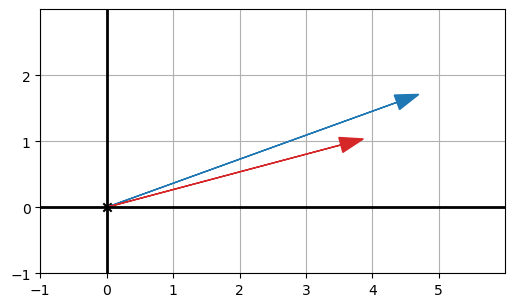

dot(v1, v2)=19.923893961834914


In [2]:
from vec2d.math import to_cartesian, to_radians
from vec2d.graph import draw, Arrow, Points, Colors
from vec3d.math import dot

v1 = to_cartesian((5, to_radians(20)))
v2 = to_cartesian((4, to_radians(15)))

draw(
    Arrow(v1, color=Colors.BLUE),
    Arrow(v2, color=Colors.RED)
)

print(f"dot(v1, v2)={dot(v1, v2)}")

Thus, we confirm that for two vectors relatively aligned, the dot product is positive ($ \approx 19.92 $).

If we now take two vectors, also pointing in similar directions, but smaller:

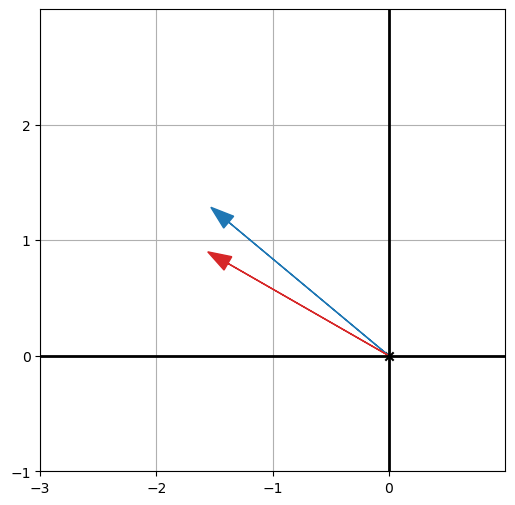

dot(v1, v2)=3.545307910843949


In [4]:
from vec2d.math import to_cartesian, to_radians
from vec2d.graph import draw, Arrow, Points, Colors
from vec3d.math import dot

v1 = to_cartesian((2, to_radians(140)))
v2 = to_cartesian((1.8, to_radians(150)))

draw(
    Arrow(v1, color=Colors.BLUE),
    Arrow(v2, color=Colors.RED)
)

print(f"dot(v1, v2)={dot(v1, v2)}")

We confirm that the dot product is still positive, but smaller (as the magnitude of the vectors is also smaller).

If we know take two vector pointing in almost opposite directions:

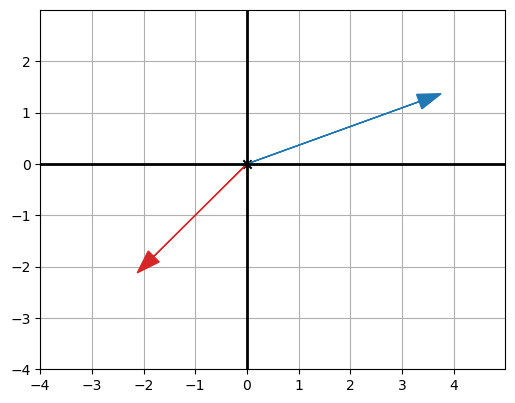

dot(v1, v2)=-10.8756934444398


In [5]:
from vec2d.math import to_cartesian, to_radians
from vec2d.graph import draw, Arrow, Points, Colors
from vec3d.math import dot

v1 = to_cartesian((4, to_radians(20)))
v2 = to_cartesian((3, to_radians(225)))

draw(
    Arrow(v1, color=Colors.BLUE),
    Arrow(v2, color=Colors.RED)
)

print(f"dot(v1, v2)={dot(v1, v2)}")

We also confirm that the dot product is negative.

And if they point in almost opposite directions and their magnitude is smaller, their dot product should be smaller too:

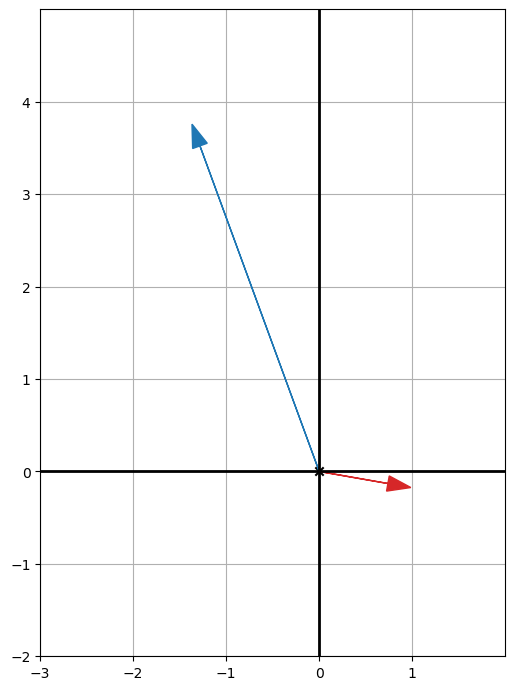

dot(v1, v2)=-2.000000000000003


In [6]:
from vec2d.math import to_cartesian, to_radians
from vec2d.graph import draw, Arrow, Points, Colors
from vec3d.math import dot

v1 = to_cartesian((4, to_radians(110)))
v2 = to_cartesian((1, to_radians(350)))

draw(
    Arrow(v1, color=Colors.BLUE),
    Arrow(v2, color=Colors.RED)
)

print(f"dot(v1, v2)={dot(v1, v2)}")

Finally, we can use another example to validate that perpendicular vectors (the angle between the vectors is 90°) render a zero dot product

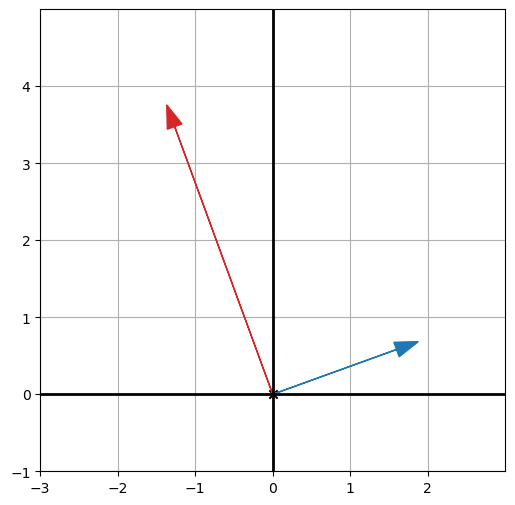

dot(v1, v2)=0.0


In [7]:
from vec2d.math import to_cartesian, to_radians
from vec2d.graph import draw, Arrow, Points, Colors
from vec3d.math import dot

v1 = to_cartesian((2, to_radians(20)))
v2 = to_cartesian((4, to_radians(20 + 90)))

draw(
    Arrow(v1, color=Colors.BLUE),
    Arrow(v2, color=Colors.RED)
)

print(f"dot(v1, v2)={dot(v1, v2)}")

### Computing the dot product

The formula for computing the dot product is:

$
\textbf{u} \cdot \textbf{v} = (u_x, u_y, u_z) \cdot (v_x, v_y, v_z) = \\
u_x \cdot v_x + u_y \cdot v_y + u_z \cdot v_z
$

As an example,

$
(1, 2, -1) \cdot (3, 0, 3) = 3 + 0 - 3 = 0
$

As the dot product of those two vectors is zero, they're perpendicular.

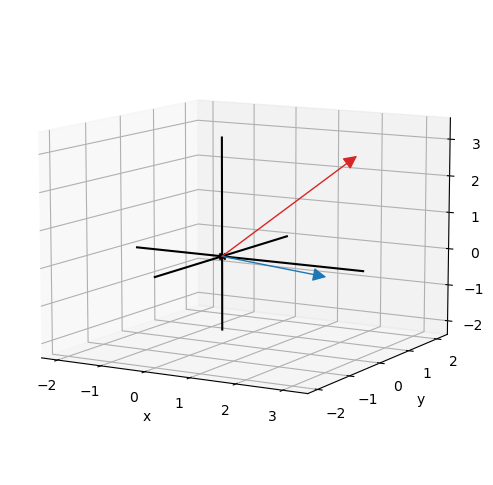

In [2]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Box3D

draw3d(
    Arrow3D((1, 2, -1), color=Colors3D.BLUE),
    Arrow3D((3, 0, 3), color=Colors3D.RED),
    elev=10
)



Note how our perspective can be misleading. Without the dot product we wouldn't probably think that the angle between the two vectors is 90°.

Changing the `elev` and `azim` parameters give us a better view

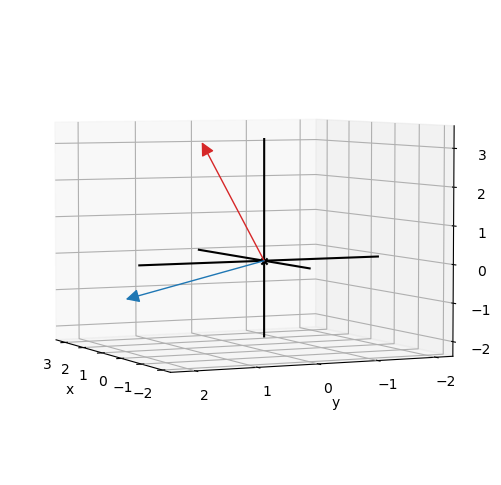

In [3]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Box3D

draw3d(
    Arrow3D((1, 2, -1), color=Colors3D.BLUE),
    Arrow3D((3, 0, 3), color=Colors3D.RED),
    elev=4,
    azim=155
)

![Right angle 3D](pics/right-angle-3d.png)

Similarly, if we consider the 2D vectors $ (2, 3) $ and $ (4, 5) $. As per the previous section, those two vectors lie in similar directions (the angle between them is less than 90°) so we expect a positive dot product.

$
(2, 3) \cdot (4, 5) = 8 + 15 = 23
$

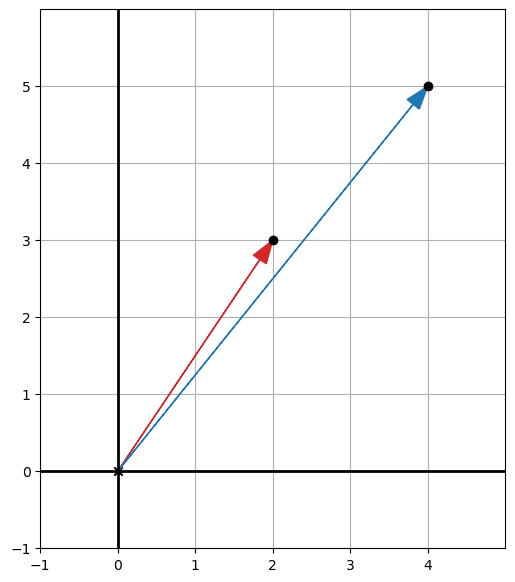

In [6]:
from vec2d.graph import Arrow, Colors, Points, draw

v1 = (2, 3)
v2 = (4, 5)

draw(
    Arrow(v1, color=Colors.RED),
    Arrow(v2, color=Colors.BLUE),
    Points(v1, v2)
)

These vectors feature the same geometrical properties whether we consider them in 2D or 3D. As a result, their dot product will remain the same:


$
(2, 3, 0) \cdot (4, 5, 0) = 8 + 15 + 0 = 23 
$

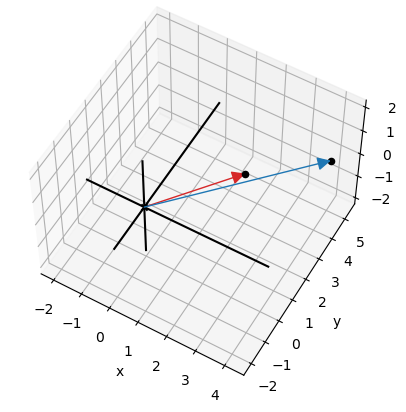

In [14]:
from vec3d.graph import Arrow3D, Colors3D, Points3D, draw3d

v1 = (2, 3, 0)
v2 = (4, 5, 0)

draw3d(
    Arrow3D(v1, color=Colors3D.RED),
    Arrow3D(v2, color=Colors3D.BLUE),
    Points3D(v1, v2),
    elev=55
)

In Python, we can define a fuction to compute the dot product for vectors of any dimension:

In [22]:
def dot_product(u, v):
    return sum((coord_u * coord_v) for coord_u, coord_v in zip(u, v))

u = (2, 3, 0)
v = (4, 5, 0)
dot_product(u, v)

23

### Developing some intuition on dot product

Let's use some additional examples to get more intuition about the dot product.

Vectors lying on different axes have zero dot product, because we know they're perpendicular:

In [9]:
from vec3d.math import dot

dot((1, 0), (0, 2))

0

In [11]:
from vec3d.math import dot

dot((0, 3, 0), (0, 0, -5))

0

Longer vectors give longer dot products (as their coordinates get scaled too!):

In [15]:
from vec3d.math import dot, scale

print(dot((3, 4), (2, 3)))
print(dot(scale(2, (3, 4)), (2, 3)))
print(dot((3, 4), scale(2, (2, 3))))

18
36
36


The dot product is proportional to each of the lengths of its input vector &mdash; if you multiply one of the length by a factor, the resulting dot product is multiplied by the same factor as seen above.

Moreover, if two vectors lie in the same direction, their dot product is precisely the multiplication of their lengths:

In [16]:
from vec3d.math import dot, length

v1 = (4, 3)
v2 = (8, 6)

print(f"dot(v1, v2) = {dot(v1, v2)}")
print(f"length(v1) = {length(v1)}")
print(f"length(v2) = {length(v2)}")
print(f"length(v1) * length(v2) = {length(v1) * length(v2)}")

dot(v1, v2) = 50
length(v1) = 5.0
length(v2) = 10.0
length(v1) * length(v2) = 50.0


Obviously, the dot product is not always equal to the product of the length of its inputs &mdash; that only happen with vectors lying in the same direction.

Let's take a few vectors having the same length of 5. We can see that their dot product ranges from 25 (when you multiply a vector by itself) to -25 when you multiply a vector by its opposite, and is zero when you multiply a vector by its perpendicular one.

Let's draw them first:

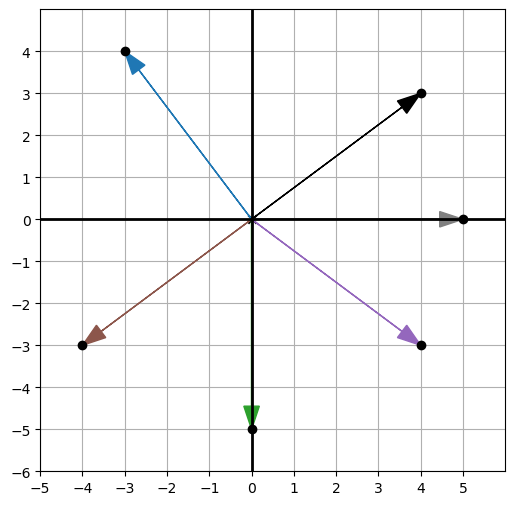

In [17]:
from vec2d.graph import draw, Colors, Arrow, Points

v1 = (4, 3)
v2 = (-3, 4)    # perpendicular to v1
v3 = (-4, -3)   # opposite to v1
v4 = (0, -5)    # same length, somewhat opposite to v1
v5 = (4, -3)    # perpendicular to v1
v6 = (5, 0)     # same length, somewhat aligned to v1

draw(
    Arrow(v1, color=Colors.BLACK),
    Arrow(v2, color=Colors.BLUE),
    Arrow(v3, color=Colors.BROWN),
    Arrow(v4, color=Colors.GREEN),
    Arrow(v5, color=Colors.PURPLE),
    Arrow(v6, color=Colors.GRAY),
    Points(v1, v2, v3, v4, v5, v6)
)



Let's now confirm our intuition with respect to the dot product:

In [19]:
from vec3d.math import dot

v1 = (4, 3)
v2 = (-3, 4)    # perpendicular to v1
v3 = (-4, -3)   # opposite to v1
v4 = (0, -5)    # same length, somewhat opposite to v1
v5 = (3, -4)    # perpendicular to v1
v6 = (5, 0)     # same length, somewhat aligned to v1

assert dot(v1, v1) == 25
assert dot(v1, v2) == 0
assert dot(v1, v3) == -25
assert dot(v1, v4) < 0 and dot(v1, v4) > -25
assert dot(v1, v5) == 0
assert dot(v1, v6) > 0 and dot(v1, v6) < 25

### Measuring angles with the dot product

We've seen that the dot product varies based on the angle between two vectors, ranging from -1 to +1 times the product of the lengths of the vectors as the angle ranges from 0° to 180°.

If we explore the cosine function, we see a similarity.

The $ y = cos(x) $ ranges as well from -1 to +1 as the angle ranges from 0 to $ 2 \pi $.

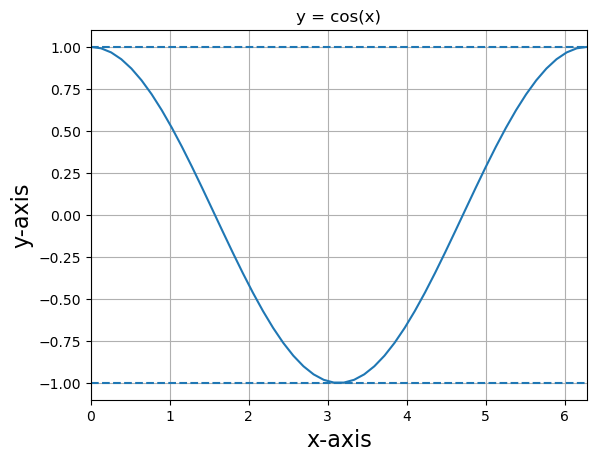

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

x = np.linspace(0, 2 * pi)
y = np.cos(x)

plt.xlim(0, 2 * pi)


plt.title("y = cos(x)")
plt.xlabel("x-axis", fontsize=16)
plt.ylabel("y-axis", fontsize=16)
plt.grid(True)

plt.plot(x, y)
plt.plot([0, 2 * pi], [1, 1], linestyle="dashed", color="C0")
plt.plot([0, 2 * pi], [-1, -1], linestyle="dashed", color="C0")



plt.show()

It turns out that the dot product can also be written as:

$
\textbf{u} \cdot \textbf{v} = |u| \cdot |v | \cdot  cos(\theta)
$

where $ \theta $ is the angle between $ \textbf{u} $ and $ \textbf{v} $.

As a result, if we know of two vectors of lengths 3 and 2 respectively, that are 75° apart, we can calculate their dot product as:

In [12]:
from math import cos
from vec2d.math import to_radians

3 * 2 * cos(to_radians(75))

1.5529142706151244

The formula also give us a great way to find the angle between any two vectors when their Cartesian coordinates are given.

For example, if we need to find the angle between $ (4, 3) $ and $ (3, 4) $, we can do:

$
(4, 3) \cdot (3, 4) = 24 = 5 \cdot 5 \cdot cos(\theta) \Rightarrow \\
\Rightarrow
cos(\theta) = \frac{24}{25} \Rightarrow \\
\Rightarrow
\theta = arccos(\frac{24}{25}) \approx 0.284 \approx 16.3°
$


Computing the angle of a vector in 2D was easy, and that's why we didn't need to define the dot product then.

The dot product becomes really useful in 3D and beyond, where a change of coordinates from Cartesian to spherical won't help that much.

For example, let's find the angle between $ (1, 2, 2) $ and $ (2, 2, 1).

$
(1, 2, 2) \cdot (2, 2, 1) = 2 + 4 + 2 = 8 = 3 \cdot 3 \cdot cos(\theta) \Rightarrow \\
cos(\theta) = \frac{8}{9} \Rightarrow \\
\theta = arccos(\frac{8}{9}) \approx 0.476  \approx 27.3°
$


We can generalize the formula:

> Given two vectors $ \textbf{u} $ and $ \textbf{v} $, the angle between them $ \theta $ can be calculated as:

$
\displaystyle
\theta = arccos(\frac{\textbf{u} \cdot \textbf{v}}{| \textbf{u} | \cdot | \textbf{v} |})
$

This formula can be easily transported to our `vec3d.math` library, although it'll work for other dimensions too:

In [16]:
from math import acos
from vec3d.math import dot, length
from vec2d.math import to_degrees

def angle_between(u, v):
    return acos(dot(u, v) / (length(u) * length(v)))

to_degrees(angle_between((1, 2, 2), (2, 2, 1)))

27.266044450732828

In [1]:
from vec3d.math import angle_between, to_degrees

to_degrees(angle_between((1, 2, 2), (2, 2, 1)))

27.266044450732828

### Exercise

Based on the following picture, rank $ \textbf{u} \cdot \textbf{v} $, $ \textbf{u} \cdot \textbf{w} $, and $ \textbf{v} \cdot \textbf{w} $ from largest to smallest.


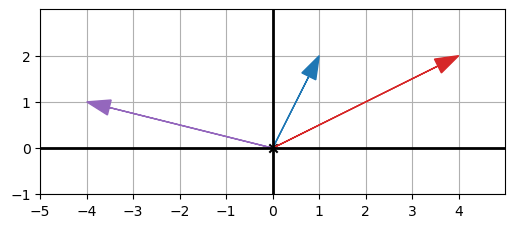

In [2]:
from vec2d.graph import draw, Arrow, Colors

u = (4, 2)
v = (1, 2)
w = (-4, 1)

draw(
    Arrow(u, color=Colors.RED),
    Arrow(v, color=Colors.BLUE),
    Arrow(w, color=Colors.PURPLE),
)

We have developed some intuition around the dot product already.

We know that:
+ it ranges from -1 to +1 times the products of the vector lengths, as the angle between the vector ranges from 0° to 180°.
+ the dot product of two perpendicular vectors is 0.

Thus:
+ $ \textbf{u} \cdot \textbf{v} $ will be the largest one, as the vectors are similarly aligned.
+ $ \textbf{u} \cdot \textbf{w} $ will be negative, and its absolute value will be larger than $ \textbf{u} \cdot \textbf{v} $.
+ $ \textbf{v} \cdot \textbf{w} $ will be the one closer to zero.

Let's confirm it:

In [5]:
from vec3d.math import dot

u = (4, 2)
v = (1, 2)
w = (-4, 1)

print(f"dot(u, v) = {dot(u, v)}")
print(f"dot(u, w) = {dot(u, w)}")
print(f"dot(v, w) = {dot(v, w)}")

assert dot(u, v) > dot(u, w) and dot(v, w) > dot(u, w)

dot(u, v) = 8
dot(u, w) = -14
dot(v, w) = -2


### Exercise

What is the dot product of $ (-1, -1, 1) $ and $ (1, 2, 1) $? Are these two 3D vectors separated by more than 90°, less than 90°, or exactly 90°?

We know that the dot product ranges from -1 to +1 the product of the vector lengths. The dot product is positive if the angle between the vectors is less than 90° (somewhat aligned), 0 if it's exactly 90°, and negative if it's more than 90° (somewhat opposite)

$
(-1, -1, 1) \cdot (1, 2, 1) = -1 + (-2) + 1 = -2
$

The dot product is negative, and therefore, the angle between the vectors is more than 90° (and less than 180°).

We can calculate the angle with the formula:

$
\displaystyle
\theta = arccos(\frac{\textbf{u} \cdot \textbf{v}}{| \textbf{u} | \cdot | \textbf{v} |})
$

$
\theta = arccos(\frac{-2}{\sqrt{3} \cdot \sqrt{6}}) \approx = 2.062 \approx 118°
$


In [1]:
from vec3d.math import angle_between, to_degrees

u = (-1, -1, 1)
v = (1, 2, 1)

theta = angle_between(u, v)
print(f"theta = {theta} radians = {to_degrees(theta)}°")

theta = 2.061679005084208 radians = 118.1255057020557°


### Exercise

For two 3D vectors $ \textbf{u} $ and $ \textbf{v} $, the values of $ (2 \textbf{u}) \cdot \textbf{v} $ and $ \textbf{u} \cdot (2 \textbf{v}) $ are both equal to $ 2 (\textbf{u} \cdot \textbf{v}) $.

In this case, $ \textbf{u} \cdot \textbf{v} = 18 $ and both $ (2 \textbf{u}) \cdot \textbf{v} $ and $ \textbf{u} \cdot (2 \textbf{v}) $ are $ 36 $, twice the original result.

Show that this works for any real number $ s $, not just $ 2 $. In other words, show that for any $ s $, the values of $ (s \textbf{u}) \cdot \textbf{v} $ and $ \textbf{u} \cdot (s \textbf{v}) $ are both equal to $ s (\textbf{u} \cdot \textbf{v}) $.

Algebraically, 

$
(s \textbf{u}) \cdot \textbf{v} = s \cdot (u_x, u_y, u_z) \cdot (v_x, v_y, v_z) = \\
= (s u_x, s u_y, s u_z) \cdot (v_x, v_y, v_z) = s u_x \cdot v_x + s u_y \cdot v_y + s u_z \cdot v_z = \\
= s (u_x \cdot vx + u_y \cdot v_y + u_z \cdot v_z ) = s \cdot (\textbf{u} \cdot \textbf{v}) = \\
u_x \cdot s v_x + u_y \cdot s v_y + u_z \cdot s v_z = (u_x, u_y, u_z) \cdot s \cdot (v_x, v_y, v_z) = ||
\textbf{u} \cdot (s \cdot \textbf{v})
$


### Exercise

Explain algebraically why the dot product of a vector with itself is the square of its length.

Let, $ \textbf{u} = (u_x, u_y, u_z) $.

Thus,

$
\textbf{u} \cdot \textbf{u} = (u_x, u_y, u_z) \cdot (u_x, u_y, u_z) = \\
= (u_x u_x + u_y u_y + u_z u_z) = (u_x^2 + u _y^2 + u_z^2) = \\
= (\sqrt{u_x^2 + u _y^2 + u_z^2})^2
$

### Exercise

Find a vector $ \textbf{u} $ of length 3 and a vector $ \textbf{v} $ of length 7 such that  $ \textbf{u} \cdot \textbf{v} = 21 $. Find another pair of vectors $ \textbf{u} $ and $ \textbf{v} $ such that $ \textbf{u} \cdot \textbf{v} = -21 $.

Finally, find three more pair of vector of respective lengths 3 and 7 and show that all of their dot products lie between -21 and 21.

Let's not use brute force for the first couple of questions, and instead, focus on the properties of the dot product:
> dot product result for two vectors ranges from -1 to +1 the product of the vector lengths. If the vectors lie in the same direction, their dot product is the product of their lengths, if they're opposite, their dot product is -1 * product of their lengths.

If $ \textbf{u} \cdot \textbf{v} = 21 $ and $ | \textbf{u} | = 7 $ and $ | \textbf{v} | = 3 $, means that they lie in the same directions.

Thus, we only need to find a solution to:

$
\textbf{u} = (u_x, u_y, u_z) = \sqrt{u_x^2 + u_y^2 + y_z^2} = 7 \Rightarrow \\
u_x^2 + u_y^2 + y_z^2 = 49
$

Thus, we can take $ u = (7, 0, 0) $ for simplicity.

Then, $ v = (3, 0, 0) $. And their dot product will be the 21.

For -21, we can take $ (0, 7, 0) $ and $ (0, -3, 0) $.

For the third question we can use Python and a more brute force approach:

In [8]:
from random import random
from math import pi
from vec2d.math import to_cartesian, length
from vec3d.math import dot



def random_vector_of_length(l):
    return to_cartesian((l, random() * 2 * pi))

vector_pairs = [(random_vector_of_length(3), random_vector_of_length(7)) for _ in range (3)]

for u, v in vector_pairs:
    print(f"u = {u}, v = {v}")
    print(f"|u| = {length(u)}, |v| = {length(v)}, dot(u, v) = {dot(u, v)}", end="\n\n")
    assert dot(u, v) >= -21 and dot(u, v) <= 21




u = (2.262031515407456, -1.9705870757983386), v = (3.5051819789844734, 6.0591830550167805)
|u| = 3.0, |v| = 6.999999999999999, dot(u, v) = -4.011315714411207

u = (2.571418460587514, 1.5452530862450136), v = (4.033771452531307, -5.720899218544535)
|u| = 2.9999999999999996, |v| = 7.0, dot(u, v) = 1.5322772052772855

u = (2.9458373446484947, -0.567487743369233), v = (3.650962405815559, -5.972476329908847)
|u| = 2.9999999999999996, |v| = 6.999999999999999, dot(u, v) = 14.144448513745317



### Exercise

Let $ u $ and $ v $ be vectors with $ |u| = 3.61 $ and $ |v| = 1.44 $. If the angle between $ u $ and $ v $ is 101.3°, what is $ u \cdot v $?

Choose your answer before doing any computation, and then calculate to confirm.

1. 5.198
2. 5.098
3. -1.019
4. 1.019 

We know that the dot product ranges from -1 to +1 the product of the corresponding vector lengths. If the vectors lie in the same direction, the dot product will be positive. Otherwise, if the vectors lie in a somewhat opposite direction (angle > 90°), it will be negative.

As the vectors lie in an opposite direction (their angle is > 90°), the solution must be 3.

We can confirm by calculating it:

$
u \cdot v = |u| \cdot |v| \cdot cos(\theta)
$

Thus,

$
u \cdot v = 3.61 \cdot 1.44 \cdot cos(101.3°) \Rightarrow
u \cdot v = -1.019
$


In [9]:
from math import cos
from vec2d.math import to_radians

3.61 * 1.44 * cos(to_radians(101.3))

-1.0186064362303022

### Exercise

Find the angle between $ (3, 4) $ and $ (4, 3) $ by converting them to polar coordinates and taking the different of the angles.

In [13]:
from vec2d.math import to_polar, to_degrees

u = (3, 4)
v = (4, 3)

u_polar = to_polar(u)
v_polar = to_polar(v)

print(f"polar: u = {u_polar}, v = {v_polar}")
print(f"angle_between = {u_polar[1] - v_polar[1]} radians = {to_degrees(u_polar[1] - v_polar[1])}°")


polar: u = (5.0, 0.9272952180016122), v = (5.0, 0.6435011087932844)
angle_between = 0.2837941092083278 radians = 16.260204708311957°


Let's confirm by using the dot product:

In [14]:
from vec3d.math import angle_between

u = (3, 4)
v = (4, 3)
print(f"angle_between = {angle_between(u, v)} radians = {to_degrees(angle_between(u, v))}°")

angle_between = 0.283794109208328 radians = 16.260204708311967°


### Exercise

What is the angle between $ (1, 1, 1) $ and $ (-1, -1, 1) $

In [15]:
from vec3d.math import angle_between, to_degrees

u = (1, 1, 1)
v = (-1, -1, 1)
print(f"angle_between = {angle_between(u, v)} radians = {to_degrees(angle_between(u, v))}°")

angle_between = 1.9106332362490186 radians = 109.47122063449069°


## The Cross Product: Measuring Oriented Area

The cross product takes two 3D vectors $ u $ and $ v $ as inputs and the output is another 3D vector. That is, the result of the cross product has not only a magnitude but also a direction.

### Orienting Ourselves in 3D

Mathematicians can use their hands to distinguish the two possible orientations of coordinates axes, and they call them right-handed and left-handed orientations.

| NOTE: |
| :---- |
| Those orientations correspond to whether the z- axis runs up or down. |

If you point your right finger along the positive x- axis, and curl your heart finger to make 90° so that it points to the positive y- axis, your thum tells you the direction of the positive z-axis.

![Rule of right hand](pics/right-hand-rule-orientation.png)

This us called the right-hand rule, which sets the right-handed orientation, in which:
+ x- positive values run in the direction of the index finger.
+ y- positive values run in the direction of the heart finger.
+ z- positive values run in the direction of your thumb.

As you can imagine, the left-hand orientation is also possible. In this orientation you use your left hand and the z- positive values go in the direction of your thumb (down) when your left index points to the positive x- axis.

![Left-hand orientation](pics/left-hand-orientation.png)

### Finding the Direction of the Cross Product

Given two input vectors, the cross product outputs a result that is perpendicular to both.

For instance, if $ u = (1, 0, 0) $ and $ v = (0, 1, 0) $, the cross product of $ u $ and $ v $, happens to be $ u \times v = (0, 0, 1) $.

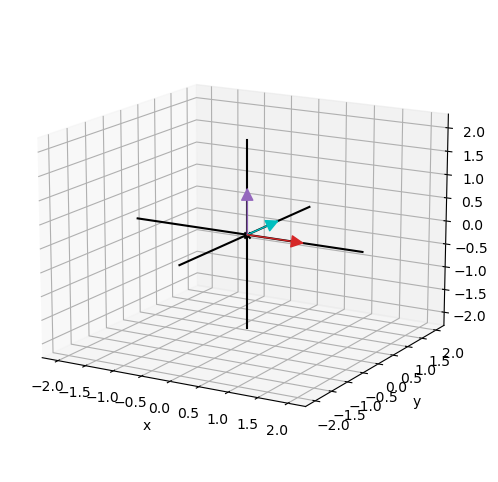

In [6]:
from vec3d.graph import draw3d, Arrow3D, Colors3D

draw3d(
    Arrow3D((1, 0, 0), color=Colors3D.RED),
    Arrow3D((0, 1, 0), color=Colors3D.CYAN),
    Arrow3D((0, 0, 1), color=Colors3D.PURPLE),
    elev=15
)

The following diagram is the same graph as above, but annotated:

![Cross product](pics/cross-product.png)

In fact, any two vectors in the plane $ z = 0 $ renders a vector on the z-axis.

Let's confirm with a few drawings and the `cross` function defined in our `vec3d.math` which calculates the cross product for two vectors.

Let's start with a couple of vectors $ u $ and $ v $ tht don't lie on the axes

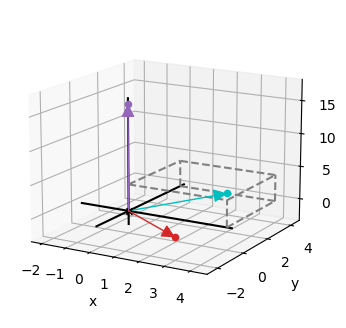

In [11]:
from vec3d.math import cross
from vec3d.graph import draw3d, Points3D, Arrow3D, Colors3D

u = (3, -2, 0)
v = (2, 4, 0)

draw3d(
    Arrow3D(u, color=Colors3D.RED),
    Arrow3D(v, color=Colors3D.CYAN),
    Arrow3D(cross(u, v), color=Colors3D.PURPLE),
    Points3D(u, color=Colors3D.RED),
    Points3D(v, color=Colors3D.CYAN),
    Points3D(cross(u, v), color=Colors3D.PURPLE),
    elev=15
)


If the direction of $ u $ and $ v $ is different (even when $ z = 0 $) the orientation of the cross product might be different too:

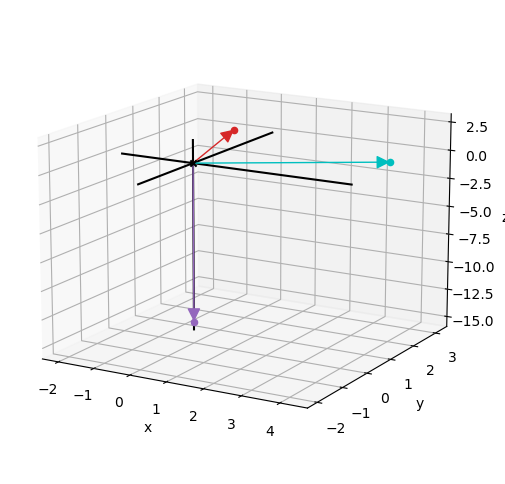

In [12]:
from vec3d.math import cross
from vec3d.graph import draw3d, Points3D, Arrow3D, Colors3D

u = (-1, 3, 0)
v = (4, 2, 0)

draw3d(
    Arrow3D(u, color=Colors3D.RED),
    Arrow3D(v, color=Colors3D.CYAN),
    Arrow3D(cross(u, v), color=Colors3D.PURPLE),
    Points3D(u, color=Colors3D.RED),
    Points3D(v, color=Colors3D.CYAN),
    Points3D(cross(u, v), color=Colors3D.PURPLE),
    elev=15
)


But as discussed before, the cross product is perpendicular to both inputs even if they don't lie in the plane $ z = 0 $.

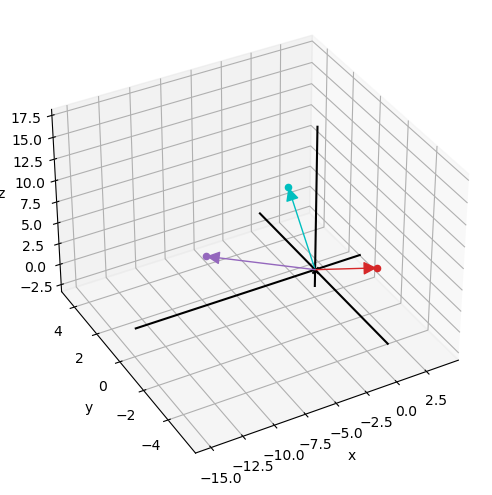

In [20]:
from vec3d.math import cross
from vec3d.graph import draw3d, Points3D, Arrow3D, Colors3D

u = (3, -2, 2)
v = (2, 4, 3)

draw3d(
    Arrow3D(u, color=Colors3D.RED),
    Arrow3D(v, color=Colors3D.CYAN),
    Arrow3D(cross(u, v), color=Colors3D.PURPLE),
    Points3D(u, color=Colors3D.RED),
    Points3D(v, color=Colors3D.CYAN),
    Points3D(cross(u, v), color=Colors3D.PURPLE),
    elev=35,
    azim=-119
)


There are two possible perpendicular directions, and the cross products selects only one.

For example: $ (1, 0, 0) \times (0, 1, 0) = (0, 0, 1) $, but the vector $ (0, 0, -1) $ would also be perpendicular to the given vectors.

Here's where orientation is used.
> The cross product obeys the right-hand rule. Once you've found the direction perpendicular to two input vectors $ u $ and $ v $, the cross product $ u \times v $ lies in a direction that puts the three vector in a right-handed configuration.

That is, you can point your right index finger in the direction of $ u $, curl your other fingers towards $ v $ , and your right thumb will point in the direction of $ u \times v $.

![Right-hand rule Cross product](pics/right-hand-rule-cross-product.png)

| NOTE: |
| :---- |
| Applying the right-hand rule for certain $ u $ and $ v $ is tricky.<br>In those instances, use your index finger to point in the same direction as $ u $, and then curl your other fingers in the direction in which you would find $ v $. |

Alternatively, you can use the formulas for the cross product in the standard basis $ \vec{i} $, $ \vec{j} $, and $ \vec{k} $ as discussed in section [Deriving the formula for the cross product](#above-and-beyond-deriving-the-formula-for-the-cross-product).

### Finding the Length of the Cross Product

In the previous section we have discussed about the direction of the cross product, but we haven't discussed anything about its length, which also encodes very useful information.

The length of the cross product tells us how big an area its two inputs span. Actually, it is equal to the area of the parallelogram defined by those two vectors.

![Magnitude of the Cross Product](pics/magnitude-cross-product.png)

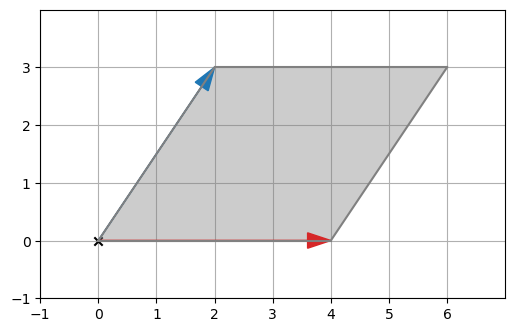

In [14]:
from vec2d.graph import draw, Polygon, Arrow, Colors

draw(
    Polygon((0, 0), (4, 0), (6, 3), (2, 3), color=Colors.GRAY, fill=Colors.GRAY),
    Arrow((4, 0), color=Colors.RED),
    Arrow((2, 3), color=Colors.BLUE),
    axes=None
)

As seen above, the parallelogram bounded by $ u $ and $ v $ has an area that is the same as the length of the cross product $ u \times v $.

For two vectors of given length, they span the most area if they are perpendicular. On the other hand, if $ u $ and $ v $, they don't span any area, and therefore, the cross product has zero length.

Two vectors in the plane $ z = 0 $ are guaranteed to have a cross product pointing in the +z or -z direction, and the bigger the parallelogram the vectors span in the $ z = 0 $, the longer the cross product will be.

There's a trigonometric formula for the area of this parallelogram:

If $ u $ and $ v $ are separated by an angle $ \theta $, the area of the parallelogram delimited by such vectors is:

$
Area = |u| \cdot |v| \cdot sin(\theta)
$

With the formula above, and the right-hand rule, let us start computing the cross product for simple examples.

For example $ (0, 2, 0) \times (0, 0, -2) $ will be $ (-4, 0, 0) $, because:

$
|(0, 2, 0)| = 2 \\
|(0, 0, -2)| = 2 \\
sin(90°deg) = 1
$

And the right hand rule, puts our thumb pointing to the x- axis.


### Computing the Cross Product of 3D Vectors

The formula for the cross product for two vectors $ u = (u_x, u_y, u_z) $ and $ v = (v_x, v_y, v_z) $ is the following:

$
\vec{u} \times \vec{v} = (u_y v_z - u_z v_y, u_z v_x - u_x v_z, u_x v_y - u_y v_x)
$

We can easily define such *hairy* formula in our `vec3d.math` library under the `cross` function:

In [1]:
from vec3d.math import cross

u = (1, 1, 0)
v = (-2, 1, 0)

print(f"u x v = {cross(u, v)}")

u x v = (0, 0, 3)


The cross product can be used to decide whether the polygon designated by two vectors $ \vec{u} $ and $ \vec{v} $ would be visible to an observer. This is because $ \vec{u} \times \vec{v} $ is perpendicular to that polygon.

#### Above and Beyond: Deriving the Formula for the Cross Product

The *hairy* formula for the cross product can be derived using a Math algebraic concept called formal determinant notation which states:

$
\vec{u} \times \vec{v} 
= (u_x, u_y, u_z) \times (v_x, v_y, v_z) = \\
= \begin{vmatrix}
\vec{i} & \vec{j} & \vec{k} \\
u_x & u_y & u_z \\
v_x & v_y & v_z
\end{vmatrix} = \\ 
\vec{i} \cdot
\begin{vmatrix}
u_y & u_z \\
v_y & v_z 
\end{vmatrix} - \vec{j} \cdot
\begin{vmatrix}
u_x & u_z \\
v_x & v_z 
\end{vmatrix} + \vec{k} \cdot
\begin{vmatrix}
u_x & u_y \\
v_x & v_y 
\end{vmatrix} = \\
(u_y v_z - u_z v_y, u_z v_x - u_x v_z, u_x v_y - u_y v_x)
$

where $ \vec{i} $, $ \vec{j} $, $ \vec{k} $ are the standard basis vectors:

$
\vec{i} = (1, 0, 0) \\
\vec{j} = (0, 1, 0) \\
\vec{k} = (0, 0, 1) \\
$

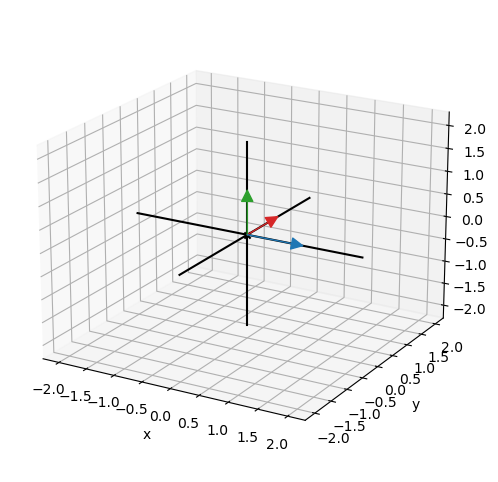

In [26]:
from vec3d.graph import draw3d, Arrow3D, Colors3D

i = (1, 0, 0)
j = (0, 1, 0)
k = (0, 0, 1)

draw3d(
    Arrow3D(i, color=Colors3D.BLUE),
    Arrow3D(j, color=Colors3D.RED),
    Arrow3D(k, color=Colors3D.GREEN),
    elev=20
)

We've seen that the cross product is a vector perpendicular to the vectors being multiplied, and the magnitude of the cross product is the area of the parallelogram delimited by those vectors.

Thus:

$
i \times j = k \\
j \times k = i \\
k \times i = j
$

Also:

$
j \times i = -k \\
k \times j = -i \\
i \times k = -j
$

and also:

$
i \times i = j \times j = k \times k = \vec{0}
$

| NOTE: |
| :---- |
| The formulas above are very helpful when the right-hand rule is difficult to apply. |


There's yet another way to derive the formula of the cross product, by using the standard basis $ \vec{i} $, $ \vec{j} $, $ \vec{k} $ to represent $ u $ and $ v $:

$
u = u_x \cdot \vec{i} + u_y \cdot \vec{j} + u_z \cdot \vec{k} \\
v = v_x \cdot \vec{i} + v_y \cdot \vec{j} + v_z \cdot \vec{k}
$

Thus,

$
u \times v = (u_x \cdot \vec{i} + u_y \cdot \vec{j} + u_z \cdot \vec{k}) \times
(v_x \cdot \vec{i} + v_y \cdot \vec{j} + v_z \cdot \vec{k}) = \\
= u_x v_x (\vec{i} \times \vec{i}) + u_x v_y (\vec{i} \times \vec{j}) + u_x v_z (\vec{i} \times \vec{k}) + \\
u_y v_x (\vec{j} \times \vec{i}) + u_y v_y (\vec{j} \times \vec{j}) + u_y v_z (\vec{j} \times \vec{k}) + \\
u_z v_x (\vec{k} \times \vec{i}) + u_z v_y (\vec{k} \times \vec{j}) + u_z v_z (\vec{k} \times \vec{k}) = \\
\vec{0} + u_x v_y \cdot \vec{k} - u_x v_z \cdot \vec{j} + \\
-u_y v_x \cdot \vec{k} + \vec{0} + u_y v_z \cdot \vec{i} + \\
u_z v_x \cdot \vec{j} - u_z v_y \cdot \vec{i} + \vec{0} = \\
u_x v_y \cdot \vec{k} - u_x v_z \cdot \vec{j} - u_y v_x \cdot \vec{k} + u_y v_z \cdot \vec{i} + u_z v_x \cdot \vec{j} - u_z v_y \cdot \vec{i} = \\
(u_y v_z - uz_vy) \cdot \vec{i} + (u_z v_x - u_x v_z) \cdot \vec{j} + (u_x v_y - u_y v_x) \cdot \vec{k} = \\
(u_y v_z - u_z v_y, u_z v_x - u_x v_z, u_x v_y - u_y v_x)
$

We've already seen that:

$
|u \times v| = |u| \cdot |v| \cdot sin(\theta)
$

where $ \theta $ is the angle between $ u $ and $ v $.


This gives us another way to define the cross product as:

$
u \times v = |u| \cdot |v| \cdot sin(\theta) \cdot \vec{n}
$

where $ \vec{n} $ is a unit vector perpendicular to the plane containing $ u $ and $ v $.

### Exercise

Each of the following diagrams show three mutually perpendicular arrows indicating positive x, y, and z directions. A 3D box is shown for perspective with the back of the box colored gray.

Which of the four diagrams is compatible with the orientation convention that we chose?

![Exercise: orientation](pics/exercise-orientations.png)

(a) and (c) and (d) agree with our orientation.

You have to use the right-hand rule orientation:

![Right-hand rule](pics/right-hand-rule-orientation.png)

(a) Agrees with the diagram without any rotation needed.

(b) If we put our index finger pointing towards x+ and our heart finger pointing towards y+, our thumb will be pointing towards z+. However, in the diagram, z+ is pointing in the opposite direction our thumb does.

(c) It also agrees with our orientation, but it requires our index finger to point down, and the heart finger to point towards us. The thumb will point to left, as does the z+ axis.

(d) This agrees with our orientation as well. If our index finger points us, and our heart finger points away from us, our thumb will point to the left, as z+ does.

### Exercise

If you held up a three coordinate axes in front of a mirror, would the image in the mirror have the same orientation or a different one?

A different one. Using the right-hand rule with the mirror image will make our thumb point down, while in the mirror image it will point up.

![Mirror image](pics/exercise-mirror-image.png)

![Right-hand rule](pics/right-hand-rule-orientation.png)

### Exercise

In what direction does the result $ (0, 0, 3) \times (0, -2, 0) $?

Use both the right-hand rule and the $ i $, $ j $, $ k $ rules.

Using the right hand rule orientation, and the right-hand rule for the cross product:

![Right-hand rule](pics/right-hand-rule-orientation.png)

![Right-hand rule](pics/right-hand-rule-cross-product.png)

In our case, $ u = (0, 0, 3) $ and $ v = (0, -2, 0) $.

We can say that the direction of the cross product will be a vector pointing in the x+ direction, with its z and y coordinates set to zero.

Using the $ i $, $ j $, and $ k $ rules:


$
i \times j = k \\
j \times k = i \\
k \times i = j
$

Also:

$
j \times i = -k \\
k \times j = -i \\
i \times k = -j
$

and also:

$
i \times i = j \times j = k \times k = \vec{0}
$
$

In our case:

$
v = 3 \cdot \vec{k} \\
u = -2 \cdot \vec{j} \\
$

As, $ \vec{k} \times \vec{j} = -\vec{i} $, and $ 3 \cdot -2 = -6 $, thus it will be $ -6 \cdot -(\vec{i}) = 6 \vec{i} $.

We can confirm with our math lib:

In [2]:
from vec3d.math import cross

u = (0, 0, 3)
v = (0, -2, 0)

print(f"u x v = {cross(u, v)}")

u x v = (6, 0, 0)


### Exercise

What are the coordinates of the cross product $ (1, -2, 1) $ and $ (-6, 12, -6) $?.

Give the first answer without using Python or the formula for the cross product.

The two vectors are opposite. Thus, the area of the parallelogram they span is zero. As a result, the cross product will be zero.

Let's confirm:

In [3]:
from vec3d.math import cross

u = (1, -2, 1)
v = (-6, 12, -6)

print(f"u x v = {cross(u, v)}")

u x v = (0, 0, 0)


### Exercise

The area of a parallelogram is equal to the length of its base times its height.

Explain then, why the area of the parallelogram defined by vectors $ u $ and $ v $ can also be written as $ |u| \cdot |v| \cdot sin(\theta) $ where $ \theta $ is the angle between $ u $ and $ v $.

![Area of parallelogram](pics/exercise-area-of-parallelogram.png)

Consider the following diagram, in which we name the vectors that span the parallelogram:

![Exercise](pics/exercise-area-of-parallelogram-planning.png)

We know that:

$ A = base \cdot height $.

And $ |u| = base $.

As per the geometical definition of the sine:

![Distances and angles](../01_linear-algebra-2d/pics/distances-and-angles.png)


$$
sin(angle) = \frac{vertical}{distance}
$$

If we apply it to our parallelogram, the vertical distance would be the height (dotted line) and the hypothenuse would be the magnitude of the $ \vec{v} $.

Thus,

$
sin(\theta) = \frac{height}{|v|} \Rightarrow \\
height = |v| \cdot sin(\theta)
$

And therefore:

$
A = b \cdot h = |u| \cdot |v| \cdot sin(\theta)
$

### Exercise

What is the result of the cross product $ (1, 0, 1) \times (-1, 0, 0) $?

1. $ (0, 1, 0) $
2. $ (0, -1, 0) $
3. $ (0, -1, -1) $
4. $ (0, 1, -1) $


Bedore calculating it, let's see if we can derive what the solution will be.

We should start by drawing the vectors, and remembering that the cross product will be a vector perpendicular to the surface delimited by both, and whose direction is given by the right-hand rule.


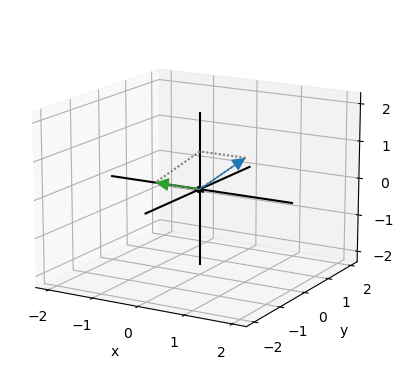

In [2]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Polygon3D, LineStyles3D
from vec3d.math import add

u = (1, 0, 1)
v = (-1, 0, 0)

draw3d(
    Arrow3D(u, color=Colors3D.BLUE),
    Arrow3D(v, color=Colors3D.GREEN),
    Polygon3D((0, 0, 0), u, add(u, v), v, color=Colors3D.GRAY, linestyle=LineStyles3D.DENSELY_DOTTED),
    elev=15
)


The vectors lie in the plane y = 0.

By the right hand rule:

![Right-hand rule](pics/right-hand-rule-orientation.png)

![Right-hand rule cross product](pics/right-hand-rule-cross-product.png)


Thus, if we curl the fingers of our right hand (except the thumb), so that they go from u to v, we will see that the thumb will be pointing towards us, that is, in the negative y. Therefore, the solution is (2) $ (0, 1, 0) $.

Let's confirm:

In [1]:
from vec3d.math import cross

u = (1, 0, 1)
v = (-1, 0, 0)

print(f"u x v = {cross(u, v)}")

u x v = (0, -1, 0)


### Exercise

Use the Python `cross` function to compute $ (0, 0, 1) \times \vec{v} $ for a few different values of a second vector v. What is the z- coordinate of each result and why?

Let's start as the exercise say, by taking a few vectors and computing the cross product:

In [4]:
from vec3d.math import cross

u = (0, 0, 1)
vs = [(x, y, z) for x in range(-2, 3) for y in range(-2, 3) for z in range (-2, 3)]

[cross(u, v) for v in vs]


[(2, -2, 0),
 (2, -2, 0),
 (2, -2, 0),
 (2, -2, 0),
 (2, -2, 0),
 (1, -2, 0),
 (1, -2, 0),
 (1, -2, 0),
 (1, -2, 0),
 (1, -2, 0),
 (0, -2, 0),
 (0, -2, 0),
 (0, -2, 0),
 (0, -2, 0),
 (0, -2, 0),
 (-1, -2, 0),
 (-1, -2, 0),
 (-1, -2, 0),
 (-1, -2, 0),
 (-1, -2, 0),
 (-2, -2, 0),
 (-2, -2, 0),
 (-2, -2, 0),
 (-2, -2, 0),
 (-2, -2, 0),
 (2, -1, 0),
 (2, -1, 0),
 (2, -1, 0),
 (2, -1, 0),
 (2, -1, 0),
 (1, -1, 0),
 (1, -1, 0),
 (1, -1, 0),
 (1, -1, 0),
 (1, -1, 0),
 (0, -1, 0),
 (0, -1, 0),
 (0, -1, 0),
 (0, -1, 0),
 (0, -1, 0),
 (-1, -1, 0),
 (-1, -1, 0),
 (-1, -1, 0),
 (-1, -1, 0),
 (-1, -1, 0),
 (-2, -1, 0),
 (-2, -1, 0),
 (-2, -1, 0),
 (-2, -1, 0),
 (-2, -1, 0),
 (2, 0, 0),
 (2, 0, 0),
 (2, 0, 0),
 (2, 0, 0),
 (2, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (-1, 0, 0),
 (-1, 0, 0),
 (-1, 0, 0),
 (-1, 0, 0),
 (-1, 0, 0),
 (-2, 0, 0),
 (-2, 0, 0),
 (-2, 0, 0),
 (-2, 0, 0),
 (-2, 0, 0),
 (2, 1, 0),
 (2, 1, 

All the z coordinates of the cross product are zero. Let's see why:

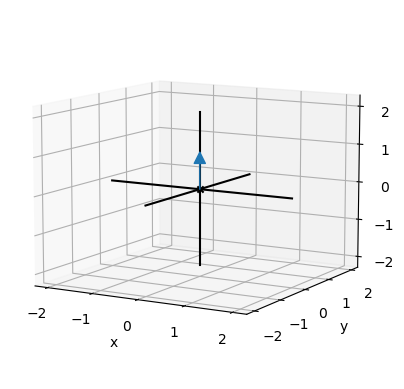

In [6]:
from vec3d.graph import draw3d, Arrow3D, Colors3D

u = (0, 0, 1)

draw3d(
    Arrow3D(u, color=Colors3D.BLUE)
)

Geometrically this makes sense. If the cross product should be perpendicular to both inputs, it must be perpendicular to (0, 0, 1), and therefore, the z component must be zero.

It also makes sense algebraically, and it can be easily demonstrated when using the basis $ i $, $ j $, and $ k $ vectors:

$
u \times v = (0 \cdot \vec{i} + 0 \cdot \vec{j} + \vec{k}) \times
(v_x \cdot \vec{i} + v_y \cdot \vec{j} + v_z \cdot \vec{k}) = \\
vx \cdot (\vec{k} \times \vec{i}) + vy \cdot (\vec{k} \times \vec{j}) + vz \cdot (\vec{k} \times \vec{k})
$

And we know that

$
\vec{k} \times \vec{k} = \vec{0}
$

Therefore, the z component will be zero.

### Exercise

Show algebraically that $ u \times v $ is perpendicular to both $ u $ and $ v $ regardless of the coordinates of $ u $ and $ v $.

We know that the concept we use to check the alignment of two any given vectors is the dot product, which is defined as:

$
\vec{u} \cdot \vec{v} = (u_x, u_y, u_z) \cdot (v_x, v_y, v_z) = u_x \cdot v_x + u_y \cdot v_y + u_z \cdot v_z = \\
|u| \cdot |v| \cdot cos(\theta)
$

On the other hand, we know that the cross product of $ \vec{u} $ and $ \vec{v} $ is defined as:

$
\vec{u} \times \vec{v} = (u_y v_z - u_z v_y, u_z v_x - u_x v_z, u_x v_y - u_y v_x)
$

Therefore, to get the alignment between a vector $ \vec{u} $ and its cross product with another vector $ \vec{v} $, we have to do:

$
\vec{u} \cdot (\vec{u} \times \vec{v}) = \\
(u_x, u_y, u_z) \cdot (u_y v_z - u_z v_y, u_z v_x - u_x v_z, u_x v_y - u_y v_x) = \\
u_x u_y v_z - u_x u_z v_y + \\
u_y u_z v_x - u_y u_x v_z + \\
u_z u_x v_y - u_z u_y v_x = 0 \Rightarrow \\
|\vec{u}| \cdot |(\vec{u} \times \vec{v})| \cdot cos(\theta) = 0 \Rightarrow \\
cos(\theta) = 0 \Rightarrow \theta = \frac{pi}{2}
$


Remember that we developed some intuition around the dot product that could be summarized as:
+ The dot product ranges from -1 to +1 times the products of the vector lengths, as the angle between the vector ranges from 0° to 180°.
+ The dot product of two perpendicular vectors is 0.

Thus, both our intuition and the analysis we've done concludes the $ \vec{u} $ and $ \vec{u} \times \vec{v} $ are perpendicular.


Similarly:

$
\vec{v} \cdot (\vec{u} \times \vec{v}) = \\
(v_x, v_y, v_z) \cdot (u_y v_z - u_z v_y, u_z v_x - u_x v_z, u_x v_y - u_y v_x) = \\
v_x u_y v_z - v_x u_z v_y + \\
v_y u_z v_x - v_y u_x v_z + \\
v_z u_x v_y - v_z u_y v_x = 0 \Rightarrow \\
|\vec{v}| \cdot |(\vec{u} \times \vec{v})| \cdot cos(\theta) = 0 \Rightarrow \\
cos(\theta) = 0 \Rightarrow \theta = \frac{pi}{2}
$


## Rendering an 3D Object in 2D

In this section we will try to render a simple 3D shape called an octahedron.

![Octahedron](pics/octahedron.png)

An octahedron has 8 faces, all of which are triangles. That is, a octahedron is like two four-sided pyramids stacked on top of each other.

The dashed lines show the edges of the octahedron that are hidden from our view. This means if we were to draw it on the screen we'd only need to draw the four visible faces:

![Octahedron: visible faces](pics/octahedron-visible-faces.png)


### Defining a 3D Object with Vectors

An octahedron is an easy example because it has only six vertices.

To start with, we can given them simple coordinates, coinciding with the coordinate axes: $ (1, 0, 0) $, $ (0, 1, 0) $, $ (0, 0, 1) $, and their three opposite vectors/points $ (-1, 0, 0) $, $ (0, -1, 0) $, $ (0, 0, -1) $.

Let's draw those points:

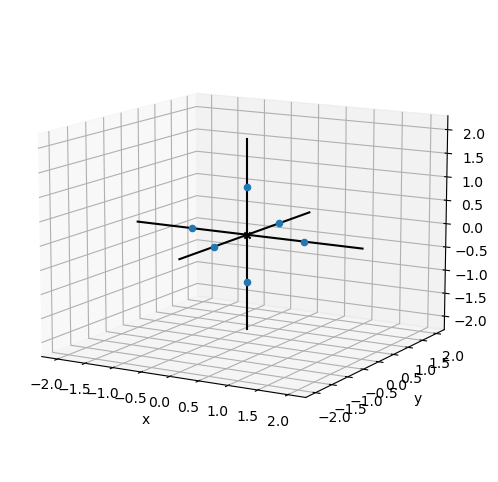

In [9]:
from vec3d.graph import draw3d, Points3D, Colors3D

points = [
    (1, 0, 0), (0, 1, 0), (0, 0, 1),
    (-1, 0, 0), (0, -1, 0), (0, 0, -1),
]

draw3d(
    Points3D(*points, color=Colors3D.BLUE),
    elev=12
)

Those six vertices are not sufficient by themselves to define the boundaries of the share &mdash; we need to define which of these vertices are to be connected to form the edges of the shape.

For example, the top point $ (0, 0, 1) $ has to be connected to all the points in the plane $ z = 0 $.

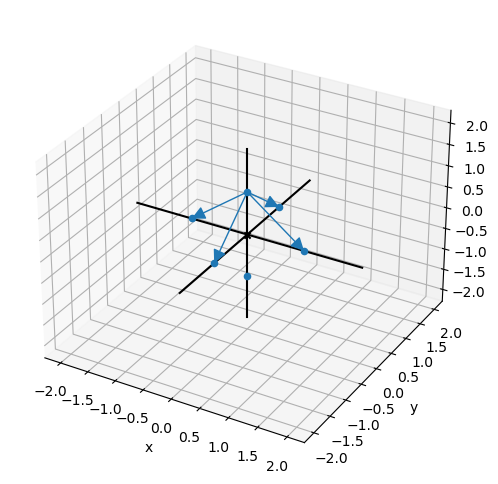

In [12]:
from vec3d.graph import draw3d, Points3D, Colors3D

points = [
    (1, 0, 0), (0, 1, 0), (0, 0, 1),
    (-1, 0, 0), (0, -1, 0), (0, 0, -1),
]

edges = [
    [(0, 0, 1), (1, 0, 0)],
    [(0, 0, 1), (-1, 0, 0)],
    [(0, 0, 1), (0, 1, 0)],
    [(0, 0, 1), (0, -1, 0)],
]

arrows = [Arrow3D(tip, tail, color=Colors3D.BLUE) for tail, tip in edges]

draw3d(
    Points3D(*points, color=Colors3D.BLUE),
    *arrows
)

Now, we have defined the top pyramid of the octahedron. Note that there is no edge from $ (0, 0, 1) $ to $ (0, 0, -1) $.

But edges still aren't enough data to complete the drawing. We also need to know which vertices and edges define the triangular faces we want to fill with a solid, shaded color.

This will end up being the triples of vertices and edges that define those triangles we want to shade.

Here is where orientation comes is: we want to know not only which segment defines the faces, but also whether they face towards us or away from us. In the latter, we wouldn't consider them, as it will spoil the shading.

The strategy to conside is as follows:

+ Each face is defined by three points $ v_1 $, $ v_2 $, and $ v_3 $.

+ We arrange them in a particular way so that $ (v_2 - v_1) \times (v_3 - v_1) $ points outside of the octahedron.

+ If an outward-pointing vector is aimed towards us, it means its face will be visible from our perspective. Otherwise, the face won't be visible and we won't need to draw it.

Let's explained the strategy discussed above with the vertices $ (0, 0, 1) $,  $ (-1, 0, 0) $, and $ (0, -1, 0) $.

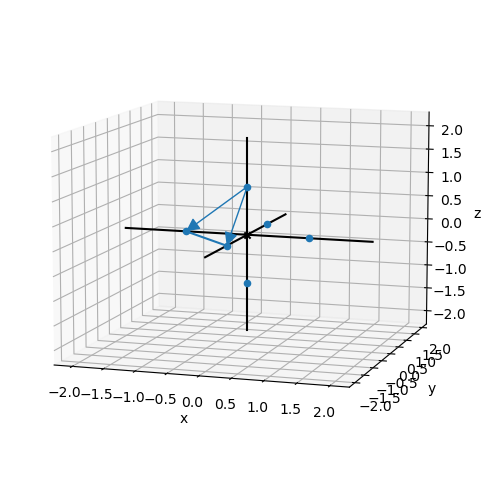

In [30]:
from vec3d.graph import draw3d, Points3D, Colors3D, Segment3D

points = [
    (1, 0, 0), (0, 1, 0), (0, 0, 1),
    (-1, 0, 0), (0, -1, 0), (0, 0, -1),
]

edges = [
    [(0, 0, 1), (-1, 0, 0)],
    [(0, 0, 1), (0, -1, 0)],
]


arrows = [Arrow3D(tip, tail, color=Colors3D.BLUE) for tail, tip in edges]

draw3d(
    Points3D(*points, color=Colors3D.BLUE),
    *arrows,
    Segment3D((-1, 0, 0), (0, -1, 0)),
    elev=10,
    azim=-72
)

The following diagram is an annotated view that will let us drill-down on the strategy:

![Octahedron: deciding visibility](pics/octahedron-deciding-visibility.png)

First, let's remember the concept of the displacement vector. The vector that runs from $ v_1 $ to $ v_2 $ can be written as $ v_2 - v_1 $. Similarly, the vector whose tail is $ v_1 $ and tip is $ v_3 $ can be written as $ v_3 - v_1 $.

Therefore, if we want to see if those vectors designate a visible or invisible surface, we'll need to calculate its cross vector in a way that it points outward from the octahedron.

Using the right-hand rule, we see that that cross vector to calculate will be $ (v_2 - v_1) \times (v_3 - v_1) $ (instead of $ (v_3 - v_1) \times (v_2 - v_1) $).


Using this strategy we've used for the $ (v_1, v_2, v_3) $ face can be extended for the rest of the faces.

In [ ]:
octahedron = [
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
    [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
    [(-1, 0, 0), (0, 0, -1), (0, -1, 0)],
]

With the faces listed, we can also obtained the vertices:

In [1]:
octahedron = [
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
    [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
    [(-1, 0, 0), (0, 0, -1), (0, -1, 0)],
]

def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))


vertices(octahedron)

[(0, 1, 0), (0, -1, 0), (1, 0, 0), (-1, 0, 0), (0, 0, -1), (0, 0, 1)]

### Projecting to 2D

To turn 3D points into 2D points so that they can be drawn, we must choose what 3D direction we are observing from.

Once we have two 3D vectors defining "up" and "right" from our perspective, we can project any 3D vector onto them and get two components instead of three.

The `component` function extracts the part of any 3D vector pointing in any given direction using the dot product.

In [2]:
from vec3d.math import dot, length

def component(v, direction):
    return (dot(v, direction) / length(direction))

Let's find out what this function does through a few examples:

In [4]:
from vec3d.math import dot, length

def component(v, direction):
    return (dot(v, direction) / length(direction))


u = (5, 10, 25)

assert component(u, (1, 0, 0)) == 5
assert component(u, (0, 1, 0)) == 10
assert component(u, (0, 0, 1)) == 25

So, when given the standard basis, the `component` function return the corresponding components of the vector.

The interesting part is that you can also pass any direction vector:

In [5]:
from vec3d.math import dot, length

def component(v, direction):
    return (dot(v, direction) / length(direction))


u = (5, 10, 25)
dir = (1, 1, 1)

print(f"component({u}, {dir})={component(u, dir)}")

component((5, 10, 25), (1, 1, 1))=23.094010767585033


This function can be used to project from three coordinates down to two:

In [6]:
def vector_to_2d(v):
    return (component(v, (1, 0, 0)), component(v, (0, 1, 0)))

We can picture that function as a "flattening" of the given 3D vector into the 2D plane. That is, we're merely deleting the z component of the given vector

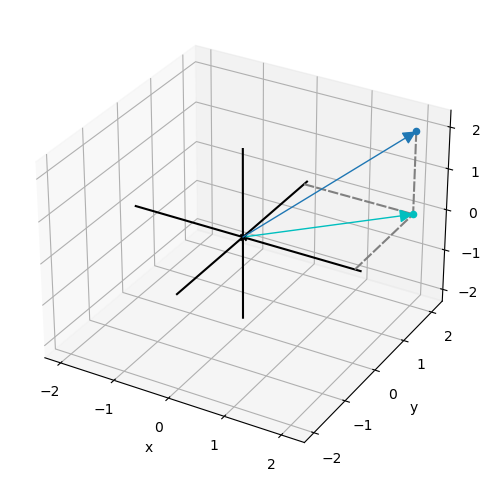

In [23]:
from vec3d.graph import draw3d, Segment3D, Arrow3D, Colors3D, Points3D, LineStyles3D


# A vector in 3D with non-zero components on every axis
v = (2, 2, 2)

# The projection as `vector_to_2d` would do
v_projected = (2, 2, 0)

draw3d(
    Arrow3D(v, color=Colors3D.BLUE),
    Points3D(v, color=Colors3D.BLUE),
    Points3D(v_projected, color=Colors3D.CYAN),
    Arrow3D(v_projected, color=Colors3D.CYAN),
    Segment3D(v, v_projected, color=Colors3D.GRAY, linestyle=LineStyles3D.DENSELY_DASHED),
    Segment3D((2, 0, 0), v_projected, color=Colors3D.GRAY, linestyle=LineStyles3D.DENSELY_DASHED),
    Segment3D((0, 2, 0), v_projected, color=Colors3D.GRAY, linestyle=LineStyles3D.DENSELY_DASHED),
)

Thus, by deleting the z component of a 3D vector, we're projecting it into the 2D plane.

To take a triangle from 3D to 2D we'll have to do the same for every vertex of the triangle:

In [24]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

### Orienting Faces and Shading

The strategy for shading our 2D drawing consists of picking a fixed color for each triangle according to how much it faces a given light source.

The brightness of any given triangular face is a function of how close to perpendicular that face is to the light source. We can easily do that by getting a vector perpendicular to the surface and checking its alignment with the light source.

Once the angle has been calculated, we'll need to map it to the corresponding color. Matplotlib can help us in the latter:

In [25]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [26]:
from matplotlib import colormaps

blues = colormaps.get_cmap("Blues")

That colormap will give us a function that maps numbers from 0 to 1 onto a spectrum of darker to brighter tones of blue.

As a result, our task is to find a number from 0 to 1 that indicates how bright a face should be.

Given a vector perpendicular to a given face (usually called *normal* and denoted as $ \vec{n} $), and a vector pointing to the light source, we know that the dot product will tell us how aligned they are.

Also, as we're only concern of directions, we can choose vectors of length 1, which will simplify the computations.

The following function returns a vector that lies in the same direction as the one given, but whose length is 1.

In [27]:
from vec3d.math import scale

def unit(v):
    return scale(1. / length(v), v)

Then, if the face is pointing towards the light source, the dot product of its normal and the light source vector will lie between 0 and 1. If it's further than 90° from the light source will be negative, and will not be illuminated at all.

Remember:
+ The dot product ranges from -1 to +1 times the products of the vector lengths, as the angle between the vector ranges from 0° to 180°.
+ The dot product of two perpendicular vectors is 0.

We can also define the `normal` helper function which will give us the $ \vec{n} $ for any given triangular face.

Remember that the sorting of the vertices of the faces was important, so that this vector lies outward from the shape:

In [31]:
from vec3d.math import cross, subtract

def normal(face):
    return (cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

Now, we can put it all together in a `render` function that takes a 3D shape defined by its faces and draws it in the 2D plane using our `draw` function:

In [35]:
from vec2d.graph import draw, Polygon, Colors

def render(faces, light=(1, 2, 3), colormap=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            fill_color = Colors.BLUE # colormap(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon(*face_to_2d(face), fill=fill_color, color=lines)
            polygons.append(p)
    draw(*polygons, axes=False, origin=False, grid=None)

With this function in place, we can request the rendering of our octahedron.

Note that the cell below puts everything together:

| NOTE: |
| :---- |
| The example below requires `vec2d==0.2.0` because in the previous version, the use of colormaps caused the figure to be distorted for some reason. |

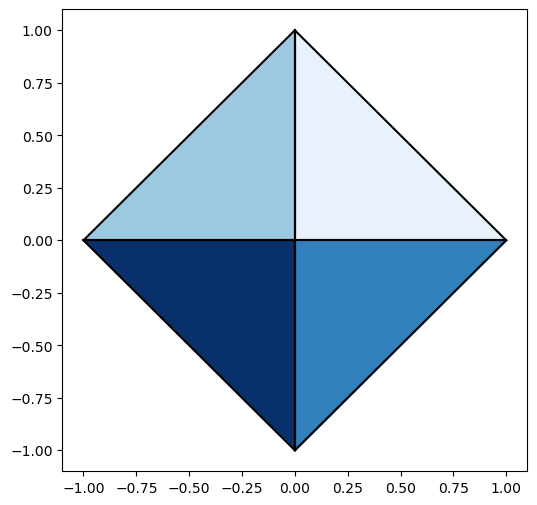

In [2]:
from matplotlib import colormaps
from vec2d.graph import draw, Polygon, Colors
from vec3d.math import cross, subtract, scale, length, dot


blues = colormaps.get_cmap("Blues")

octahedron = [
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
    [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
    [(-1, 0, 0), (0, 0, -1), (0, -1, 0)],
]


def unit(v):
    return scale(1. / length(v), v)

def normal(face):
    return (cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

def component(v, direction):
    return (dot(v, direction) / length(direction))

def vector_to_2d(v):
    return (component(v, (1, 0, 0)), component(v, (0, 1, 0)))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]


def render(faces, light=(1, 2, 3), colormap=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            fill_color = colormap(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon(*face_to_2d(face), fill=fill_color, color=lines)
            polygons.append(p)
    draw(*polygons, axes=False, origin=False, grid=None)

render(octahedron, lines=Colors.BLACK)

That doesn't look very impressive, but we will see in the exercises that our rendering library works quite well with more complicated figures having more faces.

![Rendered sphere](pics/rendered-sphere.png)

### Exercises

Find pairs of vectors defining each of the 12 edges of the octahedron and draw all of the edges using our 3D library.

We'll first list the edges manually and draw the picture:

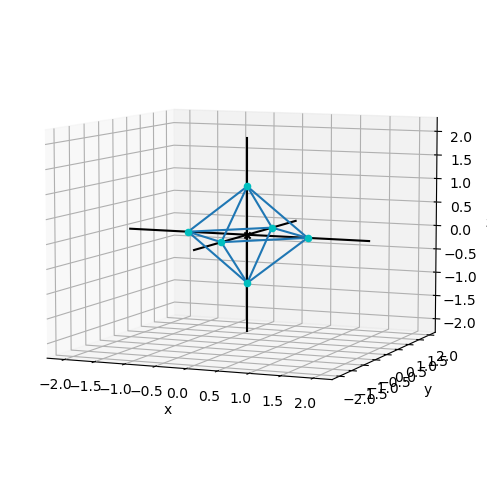

In [9]:
from vec3d.graph import draw3d, Segment3D, Colors3D, Points3D

edges = [
    # top to z = 0 plane
    [(0, 0, 1), (1, 0, 0)],
    [(0, 0, 1), (0, 1, 0)],
    [(0, 0, 1), (-1, 0, 0)],
    [(0, 0, 1), (0, -1, 0)],
    # bottom to z = 0 plane
    [(0, 0, -1), (1, 0, 0)],
    [(0, 0, -1), (0, 1, 0)],
    [(0, 0, -1), (-1, 0, 0)],
    [(0, 0, -1), (0, -1, 0)],
    # z = 0 plane segments
    [(1, 0, 0), (0, 1, 0)],
    [(0, 1, 0), (-1, 0, 0)],
    [(-1, 0, 0), (0, -1, 0)],
    [(0, -1, 0), (1, 0, 0)]
]
vertices = set([vertex for edge in edges for vertex in edge])

segments = [Segment3D(start, end, color=Colors3D.BLUE) for start, end in edges]
points = Points3D(*vertices, color=Colors3D.CYAN)

draw3d(
    *segments,
    points,
    elev=7,
    azim=-67
)

Now we can try to improve the solution by appending lists:

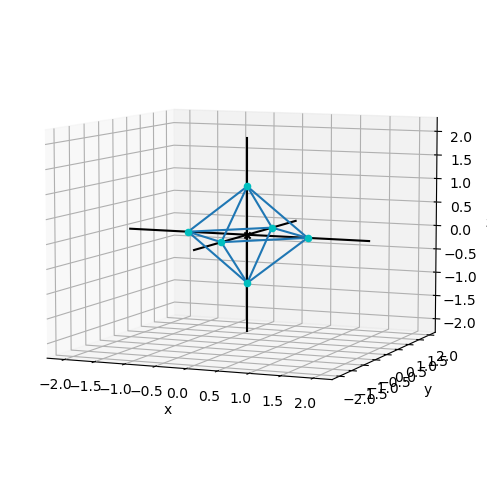

In [14]:
from vec3d.graph import draw3d, Segment3D, Colors3D, Points3D
top = (0, 0, 1)
bottom = (0, 0, -1)
xy_plane = [(1, 0, 0), (0, 1, 0), (-1, 0, 0), (0, -1, 0)]


edges = (
    [[top, v] for v in xy_plane] +
    [[bottom, v] for v in xy_plane] +
    [[xy_plane[i], xy_plane[(i + 1) % len(xy_plane)]] for i in range(len(xy_plane))]
)

vertices = set([vertex for edge in edges for vertex in edge])

segments = [Segment3D(start, end, color=Colors3D.BLUE) for start, end in edges]
points = Points3D(*vertices, color=Colors3D.CYAN)

draw3d(
    *segments,
    points,
    elev=7,
    azim=-67
)

### Exercise

The first face of the octahedron is `[(1, 0, 0), (0, 1, 0), (0, 0, 1)]`. Is that the only valid order to write the vertices for this face?


If we recall from the concepts, we look for $ v_1 $, $ v_2 $, and $ v_3 $ such that:

![Octahedron: deciding visibility](pics/octahedron-deciding-visibility.png)

That is, the vectors should be chosen so that $ (v_2 - v_1) \times (v_3 - v_1) $ is a vector that that points outward from the shape.

Let's draw these vectors:

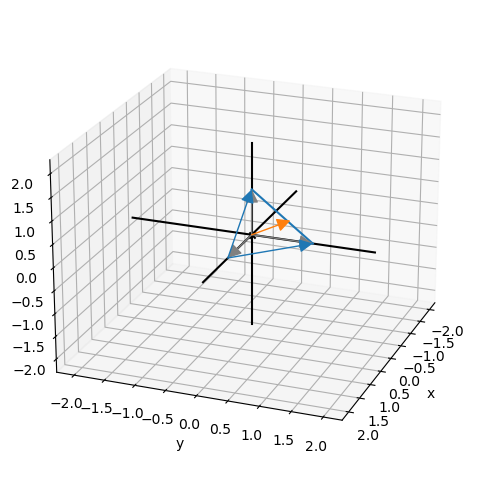

In [23]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Segment3D
from vec3d.math import cross, subtract

v1 = (1, 0, 0)
v2 = (0, 1, 0)
v3 = (0, 0, 1)

draw3d(
    Arrow3D(v1, color=Colors3D.GRAY),
    Arrow3D(v2, color=Colors3D.GRAY),
    Arrow3D(v3, color=Colors3D.GRAY),
    Arrow3D(v2, v1, color=Colors3D.BLUE),
    Arrow3D(v3, v1, color=Colors3D.BLUE),
    Segment3D(v2, v3, color=Colors3D.BLUE),
    Arrow3D(cross(subtract(v2, v1), subtract(v3, v1)), color=Colors3D.ORANGE),
    elev=22,
    azim=21
)

We've seen that `[(0, 0, 1), (1, 0, 0), (0, 1, 0)]` is also a valid set of vectors:

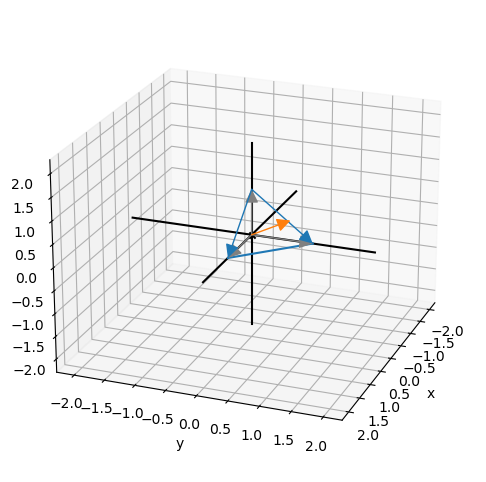

In [24]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Segment3D
from vec3d.math import cross, subtract

v1 = (0, 0, 1)
v2 = (1, 0, 0)
v3 = (0, 1, 0)


draw3d(
    Arrow3D(v1, color=Colors3D.GRAY),
    Arrow3D(v2, color=Colors3D.GRAY),
    Arrow3D(v3, color=Colors3D.GRAY),
    Arrow3D(v2, v1, color=Colors3D.BLUE),
    Arrow3D(v3, v1, color=Colors3D.BLUE),
    Segment3D(v2, v3, color=Colors3D.BLUE),
    Arrow3D(cross(subtract(v2, v1), subtract(v3, v1)), color=Colors3D.ORANGE),
    elev=22,
    azim=21
)

But there are more:

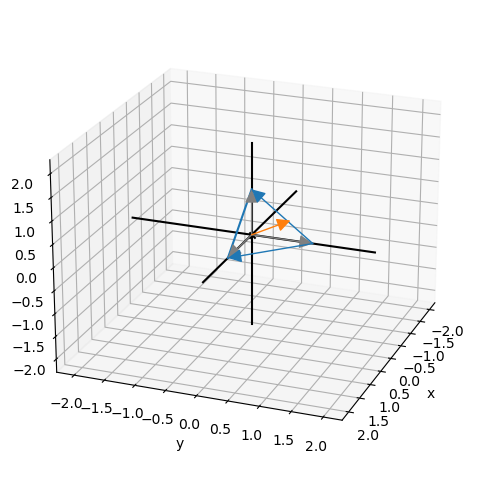

In [27]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Segment3D
from vec3d.math import cross, subtract

v1 = (0, 1, 0)
v2 = (0, 0, 1)
v3 = (1, 0, 0)


draw3d(
    Arrow3D(v1, color=Colors3D.GRAY),
    Arrow3D(v2, color=Colors3D.GRAY),
    Arrow3D(v3, color=Colors3D.GRAY),
    Arrow3D(v2, v1, color=Colors3D.BLUE),
    Arrow3D(v3, v1, color=Colors3D.BLUE),
    Segment3D(v2, v3, color=Colors3D.BLUE),
    Arrow3D(cross(subtract(v2, v1), subtract(v3, v1)), color=Colors3D.ORANGE),
    elev=22,
    azim=21
)

But the following renders a cross product that is oriented inwards:

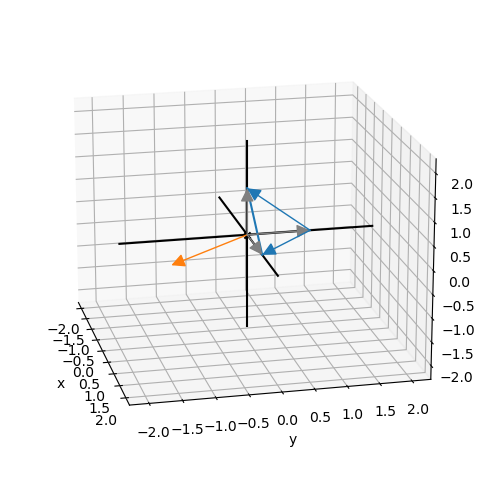

In [29]:
from vec3d.graph import draw3d, Arrow3D, Colors3D, Segment3D
from vec3d.math import cross, subtract

v1 = (0, 1, 0)
v2 = (1, 0, 0)
v3 = (0, 0, 1)

draw3d(
    Arrow3D(v1, color=Colors3D.GRAY),
    Arrow3D(v2, color=Colors3D.GRAY),
    Arrow3D(v3, color=Colors3D.GRAY),
    Arrow3D(v2, v1, color=Colors3D.BLUE),
    Arrow3D(v3, v1, color=Colors3D.BLUE),
    Segment3D(v2, v3, color=Colors3D.BLUE),
    Arrow3D(cross(subtract(v2, v1), subtract(v3, v1)), color=Colors3D.ORANGE),
    elev=18,
    azim=-13
)